# Baseball Case Study Project

**Project Description:**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

1.W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

2.R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

3.AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

4.H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

5.2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

6.3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

7.HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

8.BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.

9.SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

10.SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

11.RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

12.ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

13.ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

14.CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

15.SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

16.SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

17.E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

**Output Variable: Number of predicted wins (W)**

# Importing libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# Importing Dataset


In [3]:
df=pd.read_csv('Baseball.csv')
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

Here we downloaded the entire dataset on my local computer from •	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv and then imported to jupiter notebook

In [4]:
df.shape

(30, 17)

It is showing that this dataset has 30 rows and 17 columns.

In [5]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

Here we can see top 5 rows of the dataset

In [6]:
df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

Here we can see last 5 rows of the dataset

# Exploratory Data Analysis [EDA]

In [10]:
df.columns.to_list()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

It is showing a list of all the columns names present in the dataset

In [12]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

the dataset contains two types of data ['int64', 'float64']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Here we can see the general information about the dataset like prescence of null values, data type present in the dataset, memory usage of the dataset.

**Checking For The Null Values:**

In [14]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**Graphical Representation of Null Values Checking By usingh HeatMap:**

<AxesSubplot:>

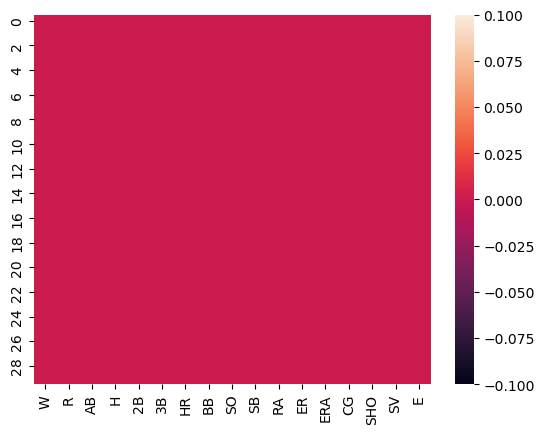

In [15]:
#By using heatmap
sns.heatmap(df.isnull())

As we can see here that no null values are present in the dataset

In [16]:
df.W.nunique()

24

out of 30 values 24 values are unique

In [17]:
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [18]:
df.value_counts('W')

W  
68     3
74     2
76     2
81     2
83     2
63     1
87     1
98     1
97     1
95     1
93     1
92     1
90     1
88     1
84     1
86     1
85     1
64     1
80     1
79     1
78     1
71     1
67     1
100    1
dtype: int64

**Statistical Information of Dataset:**

In [19]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

**Observation:**

* The count for all the rows are same so there is no null values present in the dataset

* There is a huge difference between 75th percentile and max value in columns ['E','SV','SHO','CG','ER','RA','SB','SO','BB','HR','2B','H','R'] so outliers are present in the dataset.

* In columns ['AB','H','HR'] mean is greater than median so the data is skewed to the right side.

* In columns ['R','2B','BB','SO','RA','ER','ERA','CG','SHO'] mean is less than median so the data is skewed to the left side.

* From above observation we can say that skewness and outliers are present in the dataset.

* We can also observe mean value, std. value, min. value, 25th percentile,50 percentile,75th percentile max. value of the dataset.

* There is no negative or invalid values present i nthe dataset

# Data Visualization:

**Univarient Analysis:**

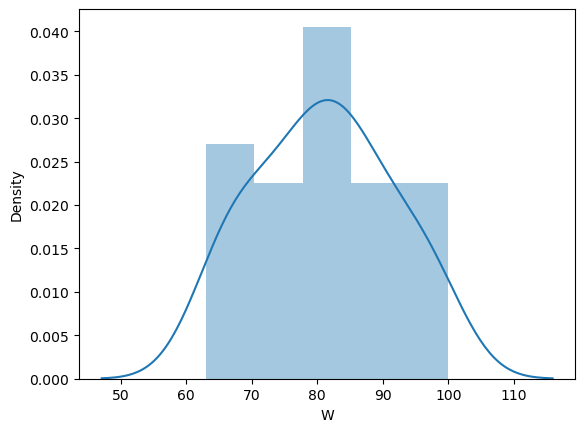

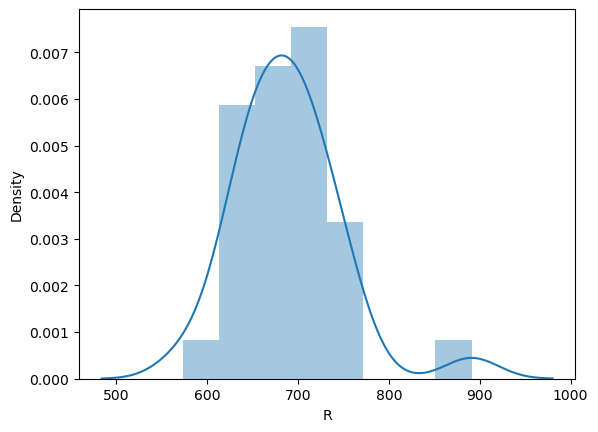

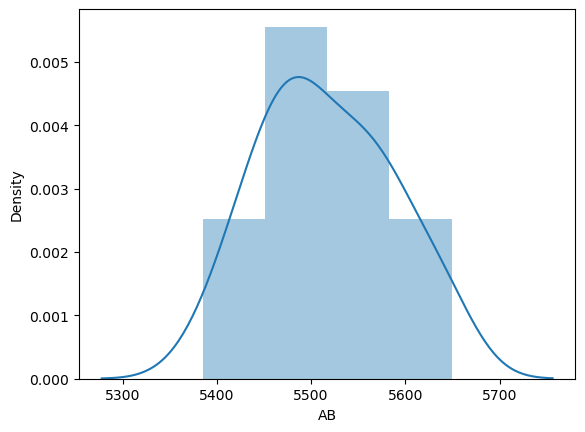

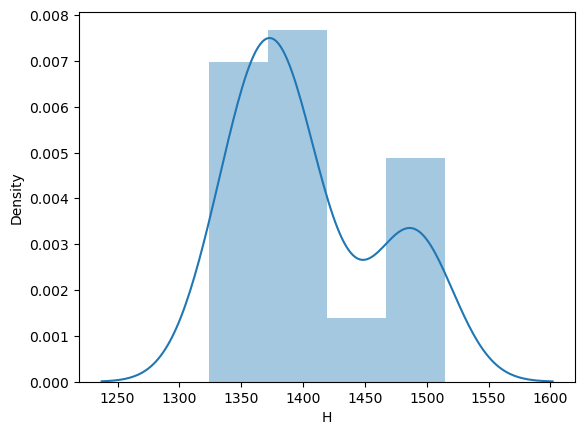

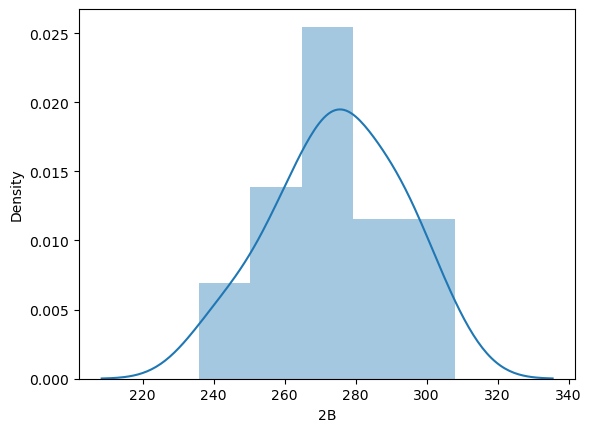

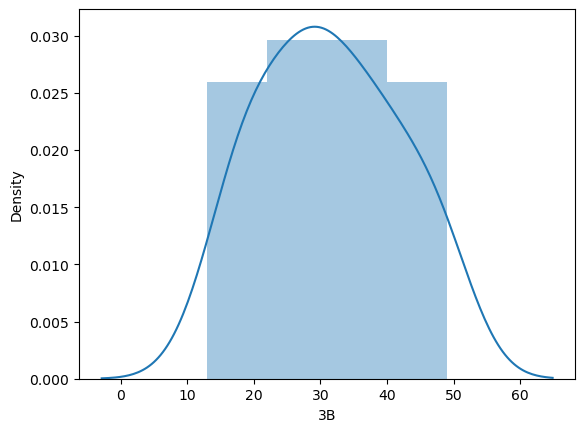

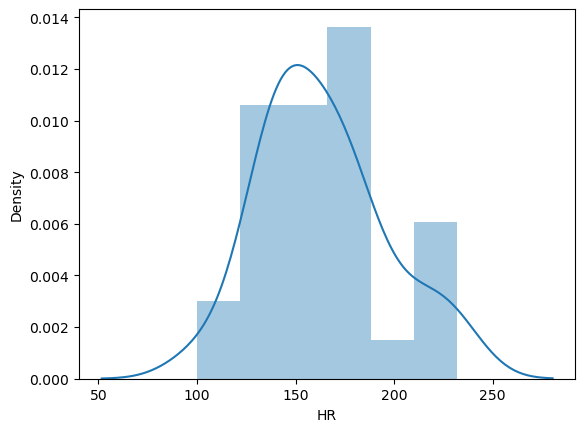

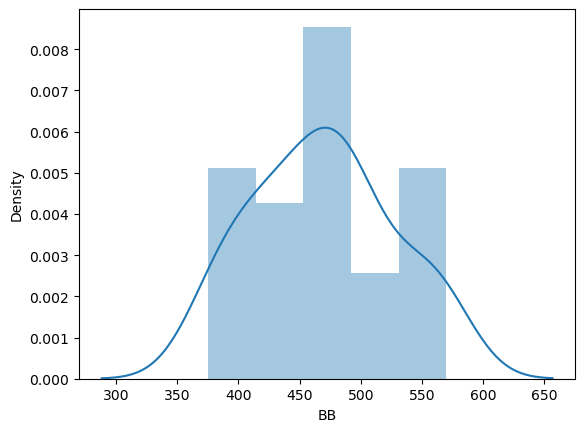

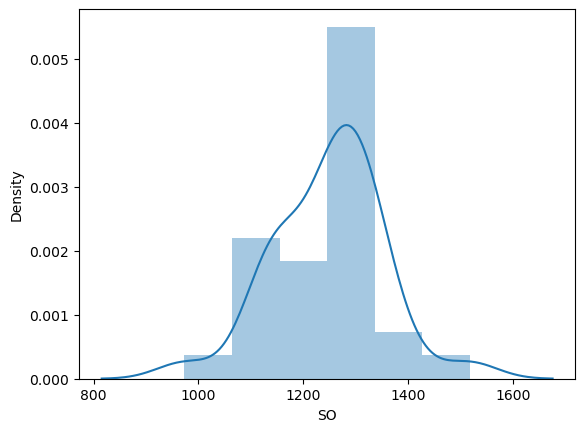

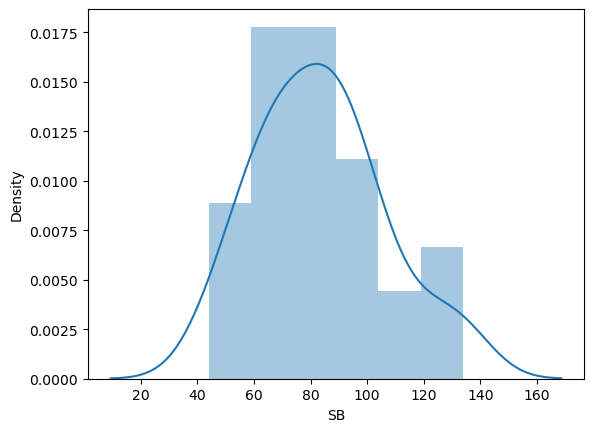

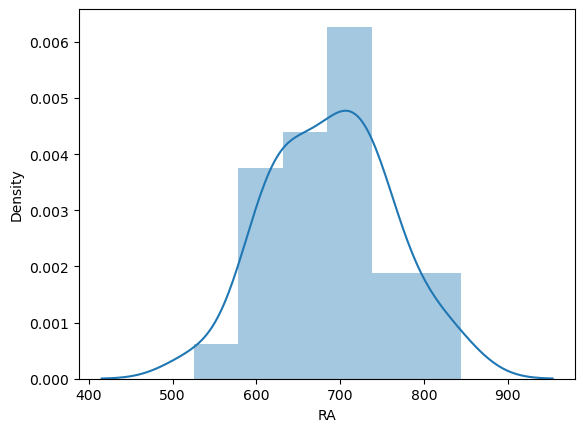

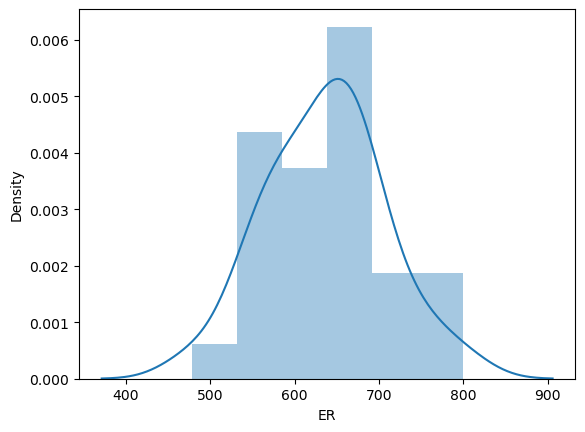

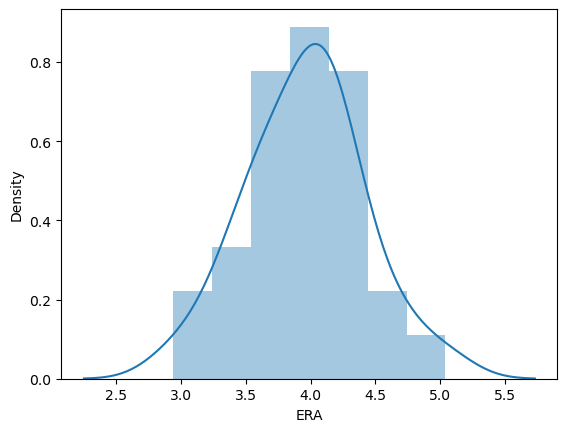

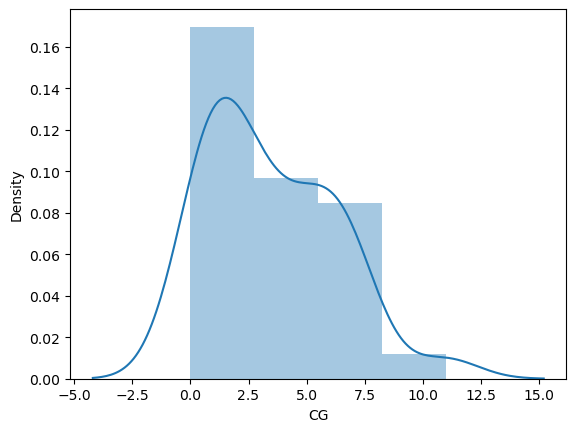

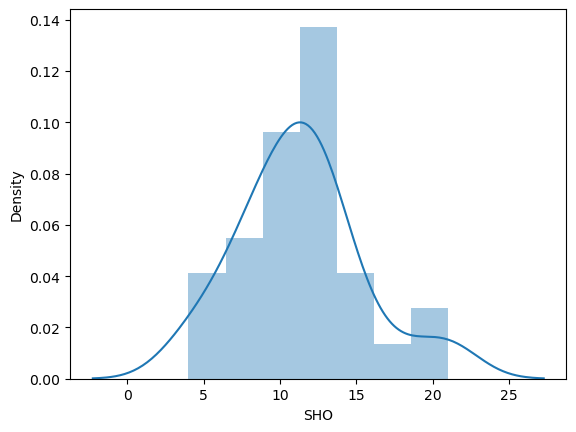

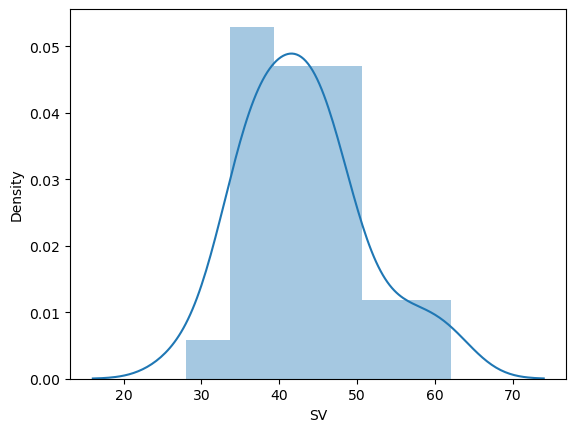

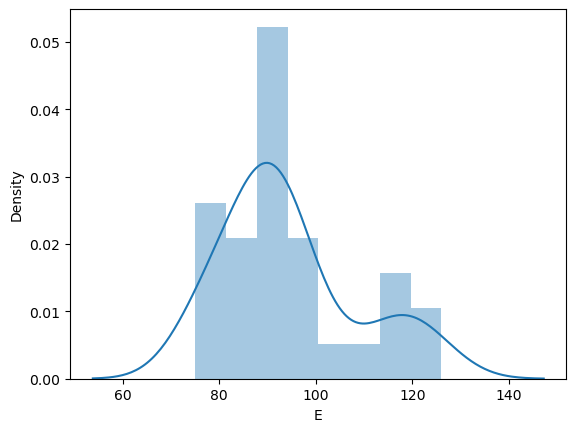

In [20]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

**Bivarient Analysis:**

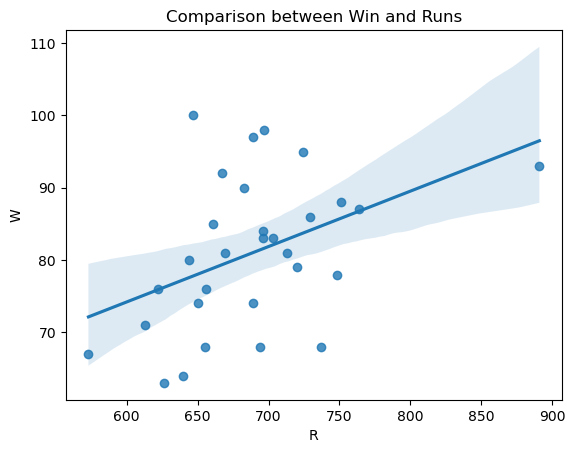

In [21]:
sns.regplot(x='R', y='W', data=df)
plt.title('Comparison between Win and Runs')
plt.show()

Run and win are linearly correlated to each other

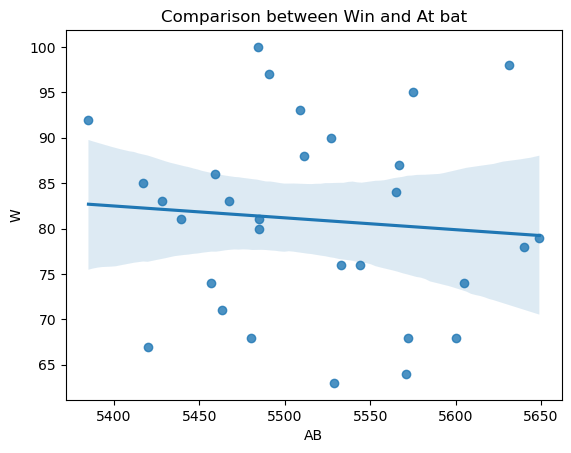

In [22]:
sns.regplot(x='AB', y='W', data=df)
plt.title('Comparison between Win and At bat')
plt.show()

At bat and win poorly related to each other

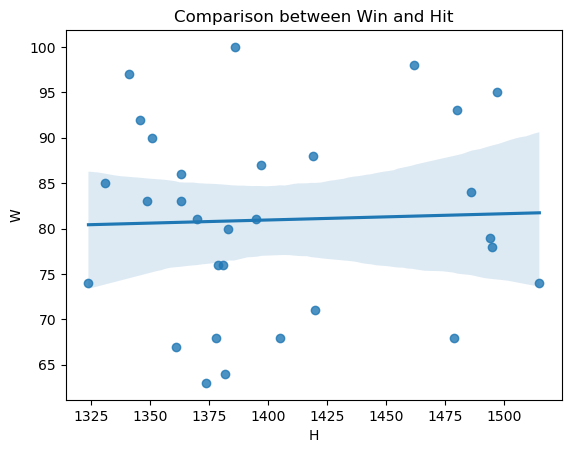

In [23]:
sns.regplot(x='H', y='W', data=df)
plt.title('Comparison between Win and Hit')
plt.show()

Hit and win is also poorly related to each other

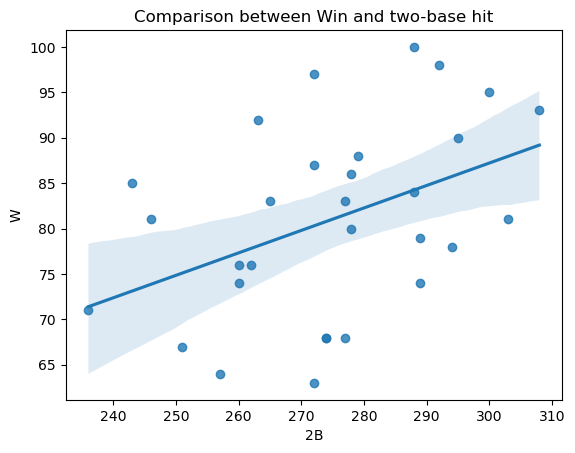

In [24]:
sns.regplot(x='2B', y='W', data=df)
plt.title('Comparison between Win and two-base hit')
plt.show()

two-base hit and win is positively correlated to each other

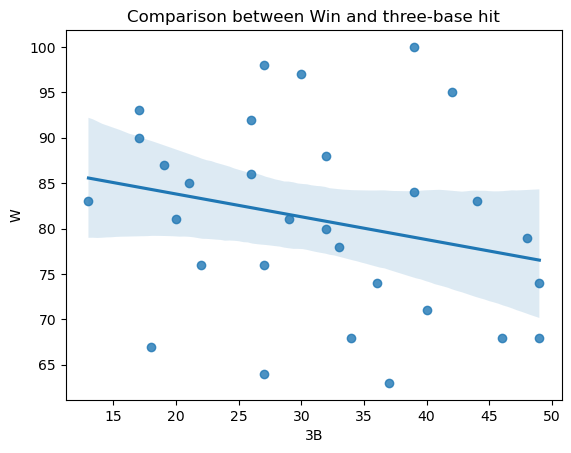

In [25]:
sns.regplot(x='3B', y='W', data=df)
plt.title('Comparison between Win and three-base hit')
plt.show()

three-base hit and win is negatively correlated to each other

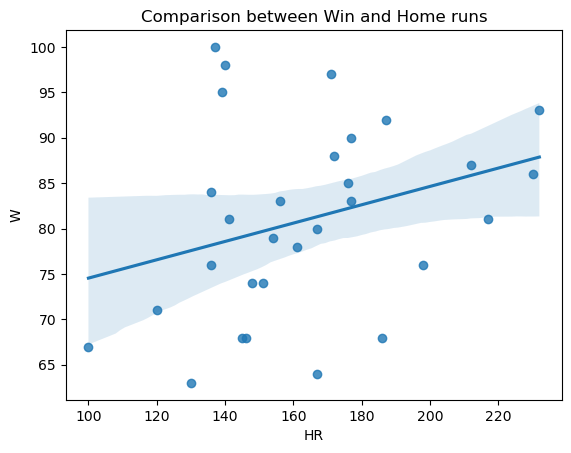

In [26]:
sns.regplot(x='HR', y='W', data=df)
plt.title('Comparison between Win and Home runs')
plt.show()

Home runs and win are positively correlated to each other

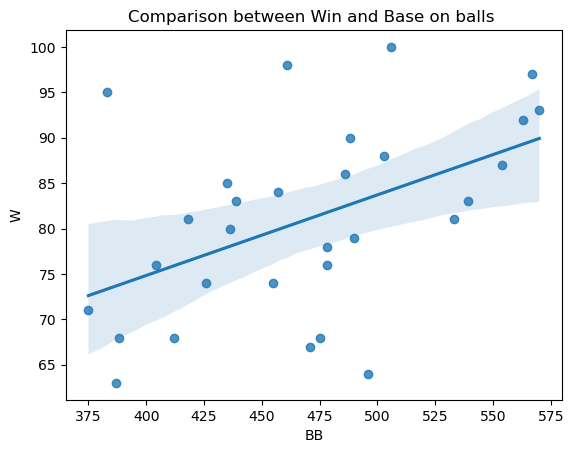

In [27]:
sns.regplot(x='BB', y='W', data=df)
plt.title('Comparison between Win and Base on balls ')
plt.show()


Base on balls and win is also positively correlated to each other

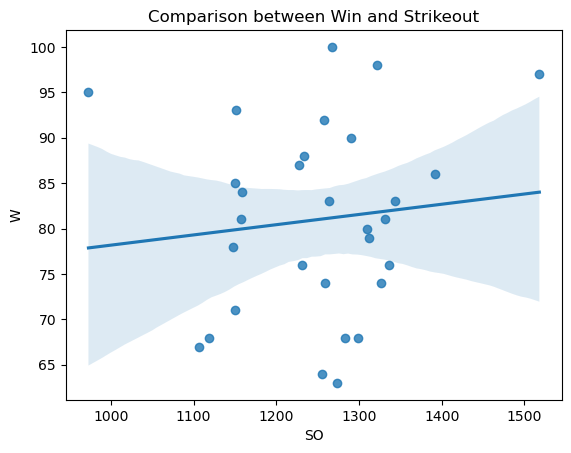

In [28]:
sns.regplot(x='SO', y='W', data=df)
plt.title('Comparison between Win and Strikeout')
plt.show()

Strikeout and win are poorly correlated to each other

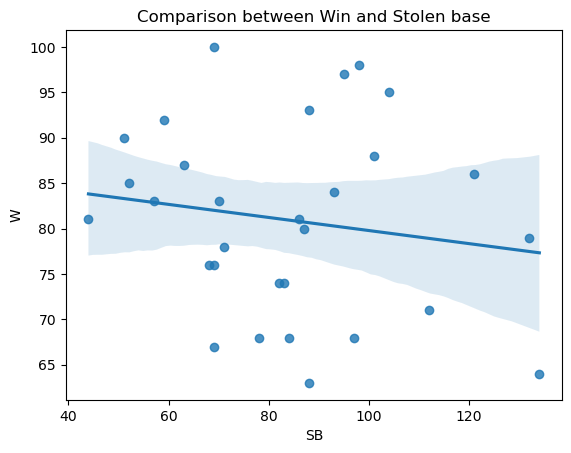

In [29]:
sns.regplot(x='SB', y='W', data=df)
plt.title('Comparison between Win and Stolen base')
plt.show()

Stolen base and win are poorly correlated to each other

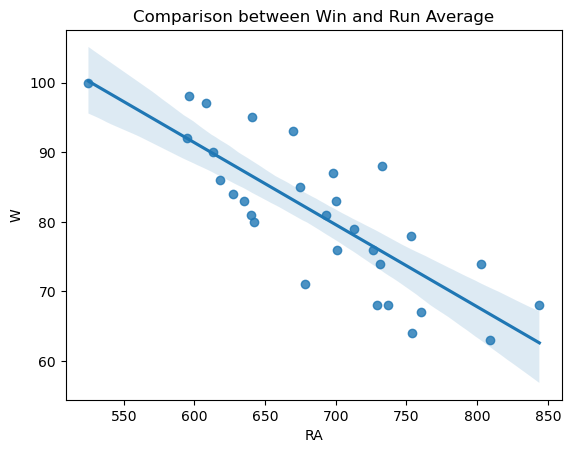

In [30]:
sns.regplot(x='RA', y='W', data=df)
plt.title('Comparison between Win and Run Average')
plt.show()

Run Average and win are negatively correlated to each other

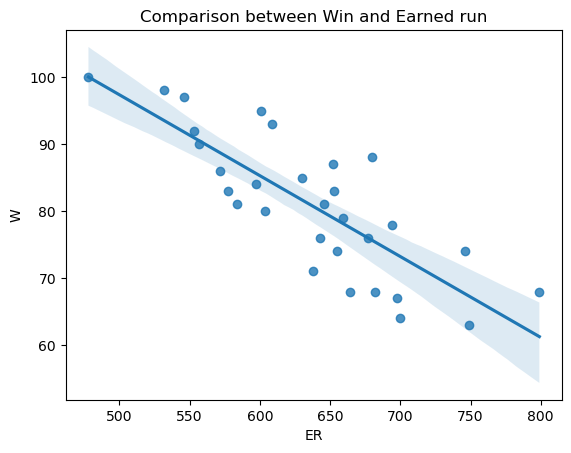

In [31]:
sns.regplot(x='ER', y='W', data=df)
plt.title('Comparison between Win and Earned run')
plt.show()

Earned run and win are negatively correlated to each other

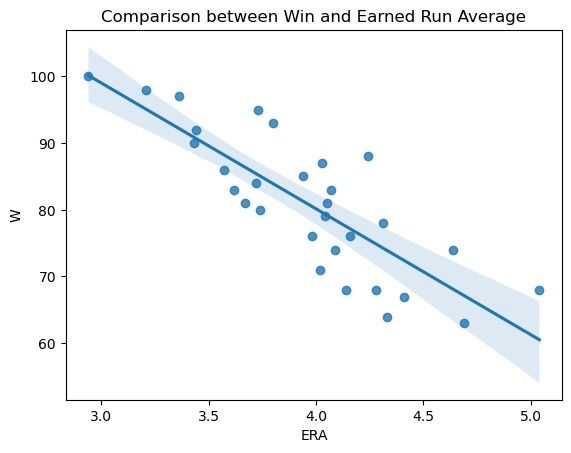

In [32]:
sns.regplot(x='ERA', y='W', data=df)
plt.title('Comparison between Win and Earned Run Average')
plt.show()

Earned Run Average and win are negatively correlated to each other

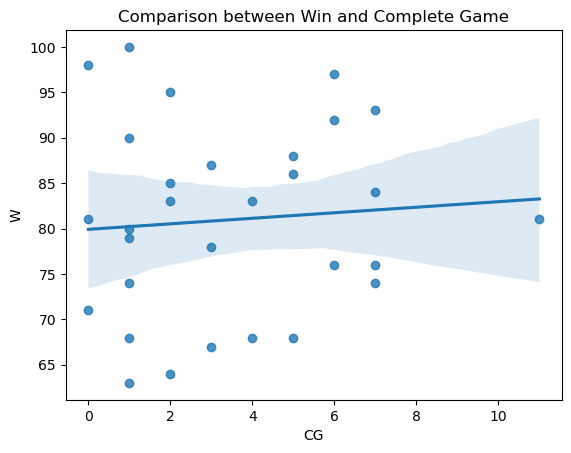

In [33]:
sns.regplot(x='CG', y='W', data=df)
plt.title('Comparison between Win and Complete Game')
plt.show()

Complete Game and win are poorly correlated to each other

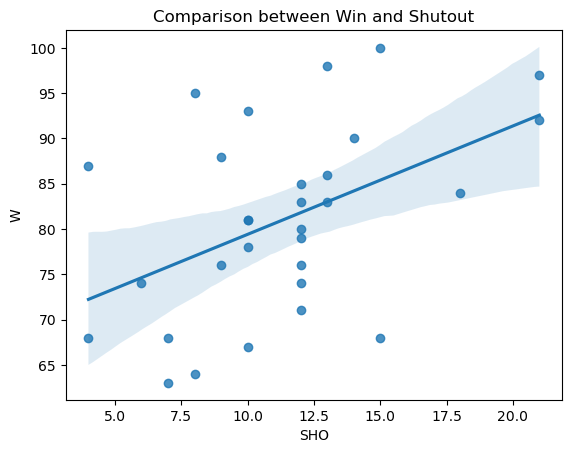

In [34]:
sns.regplot(x='SHO', y='W', data=df)
plt.title('Comparison between Win and Shutout')
plt.show()

Shutout and win are positively correlated to each other

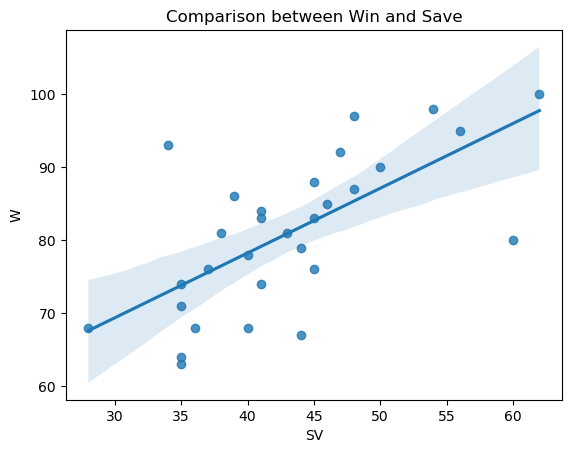

In [35]:
sns.regplot(x='SV', y='W', data=df)
plt.title('Comparison between Win and Save')
plt.show()

Save and win are postiviely correlated to each other

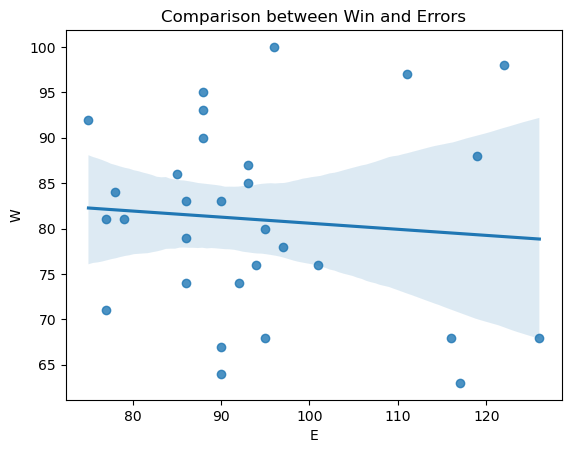

In [36]:
sns.regplot(x='E', y='W', data=df)
plt.title('Comparison between Win and Errors')
plt.show()

Errors and win are poorly/none correlated to each other

**Multivarrient Analysis:**

<Figure size 3000x2000 with 0 Axes>

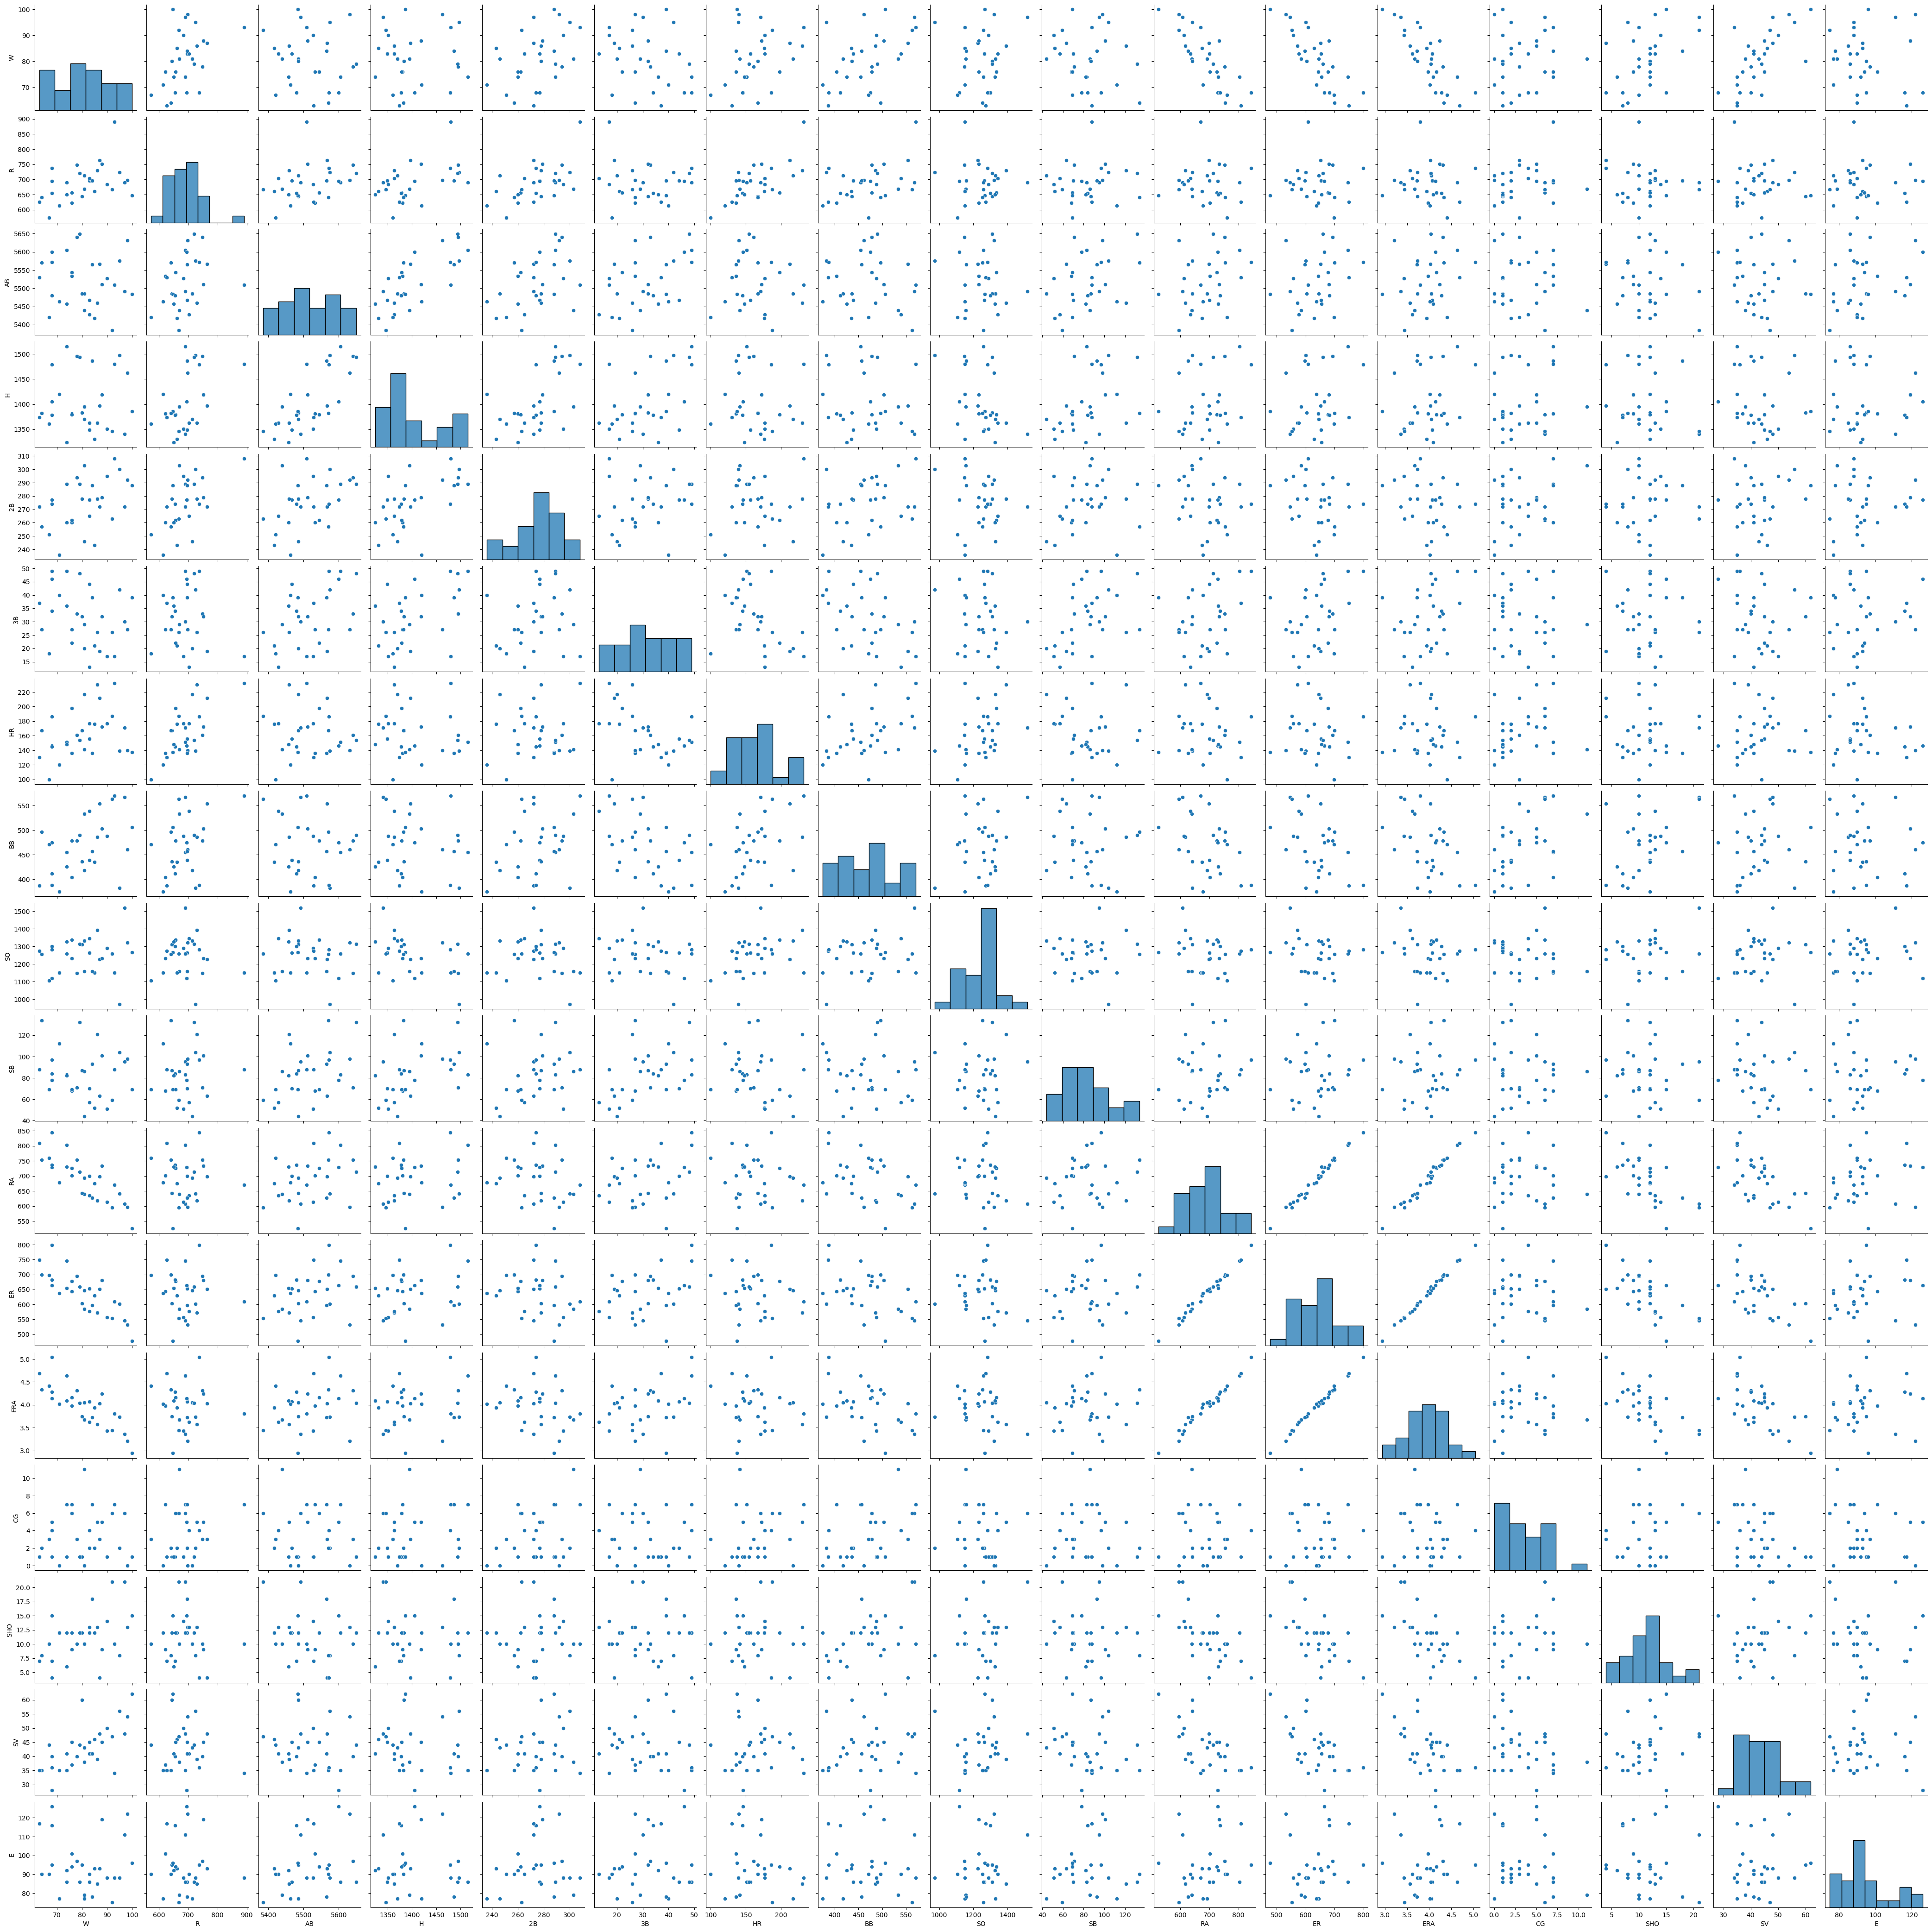

In [37]:
plt.figure(figsize=(30,20))
sns.pairplot(df)
plt.show()

<Figure size 3000x2000 with 0 Axes>

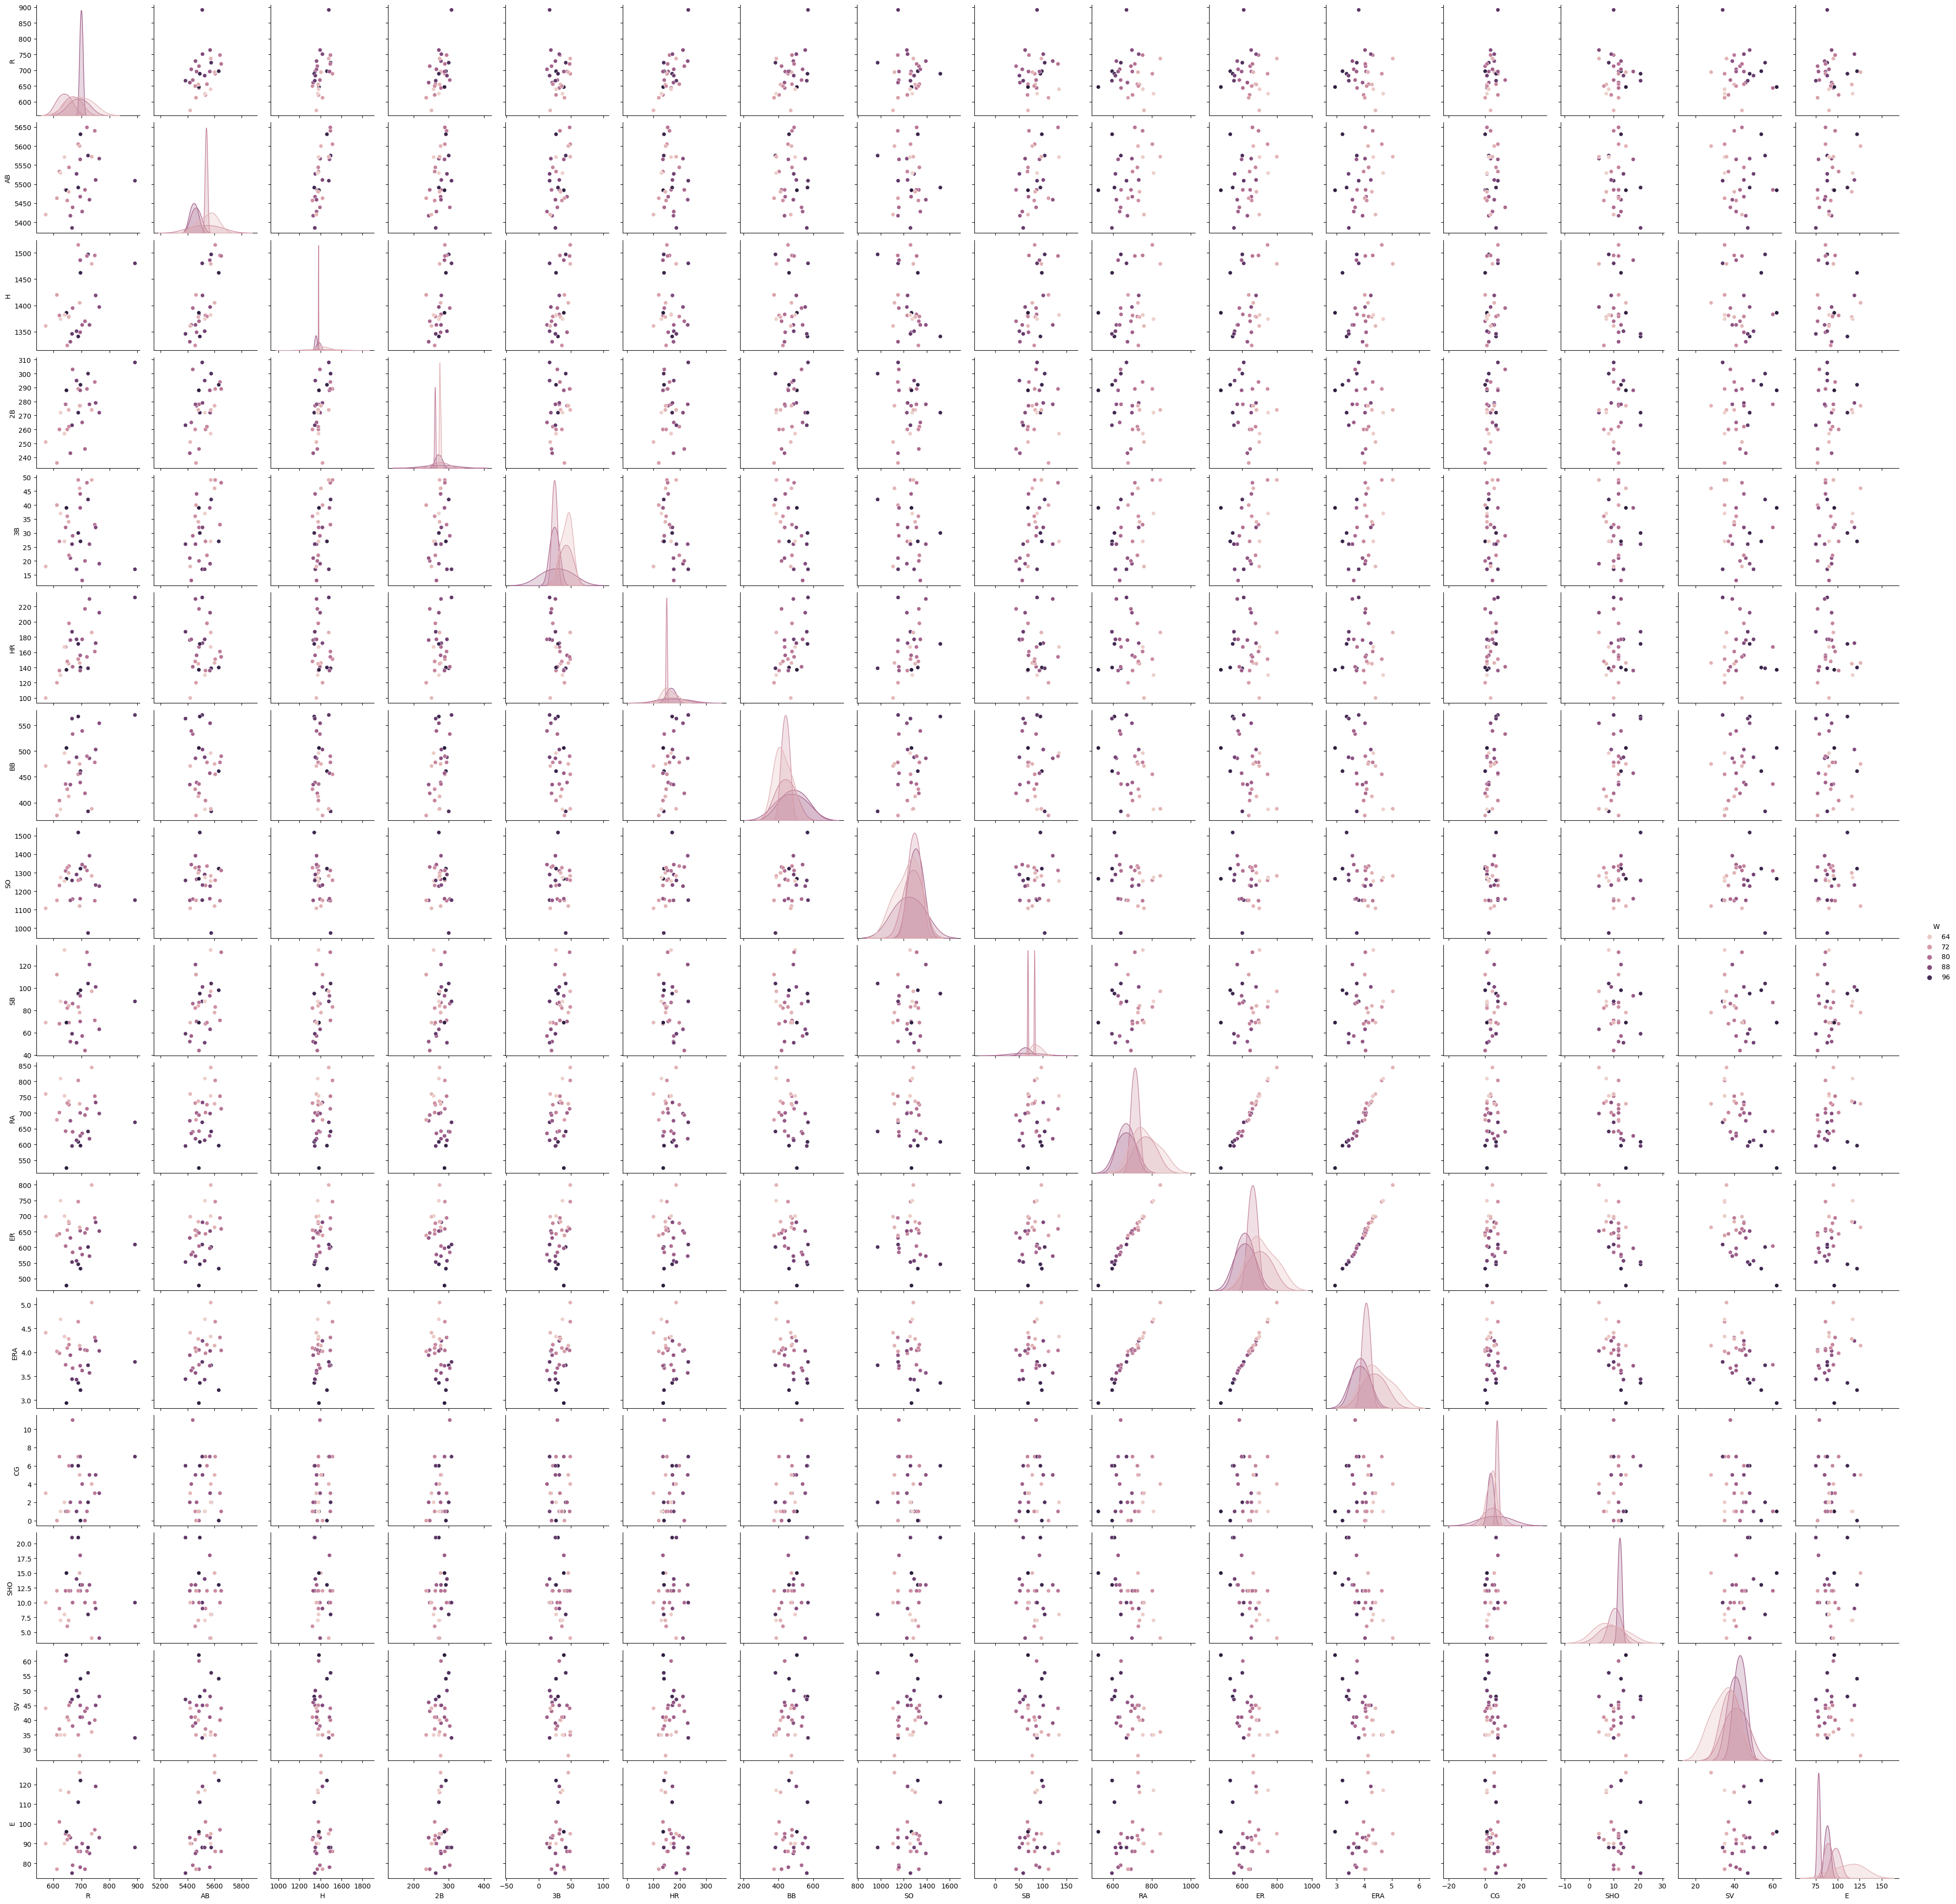

In [38]:
plt.figure(figsize=(30,20))
sns.pairplot(df, hue='W')
plt.show()

**Checking for outliers:**

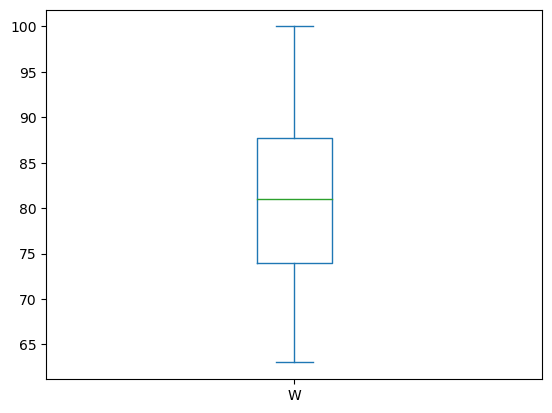

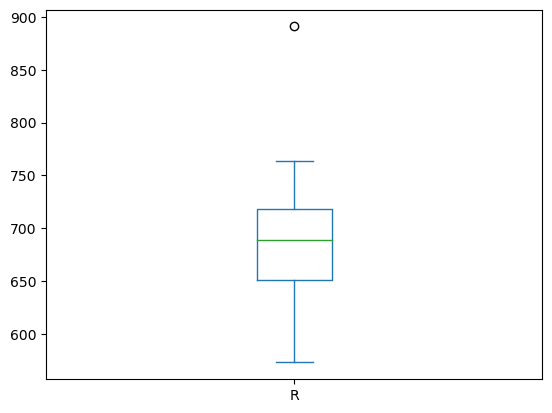

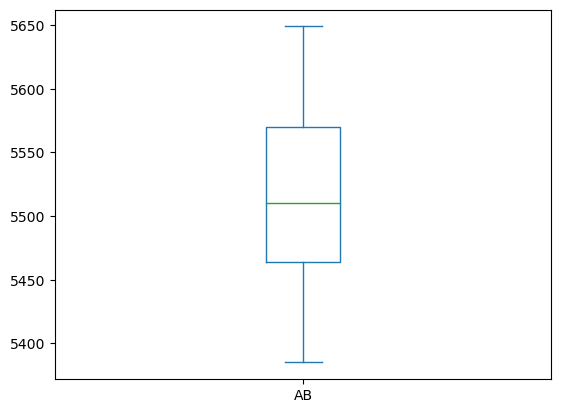

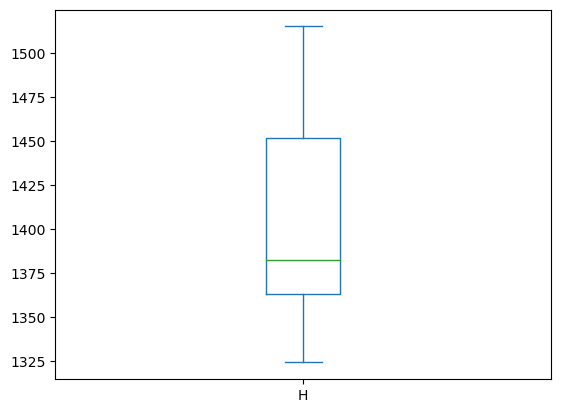

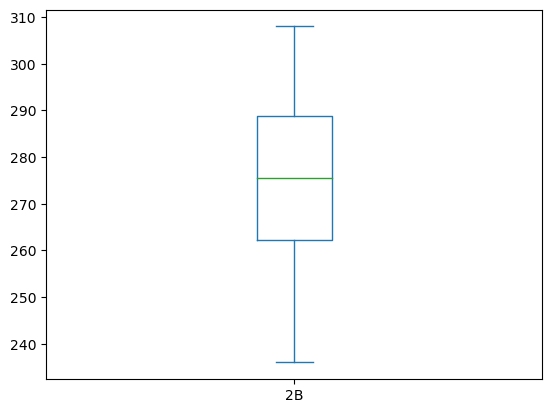

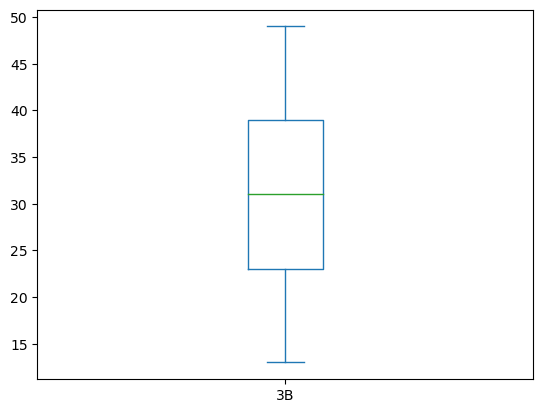

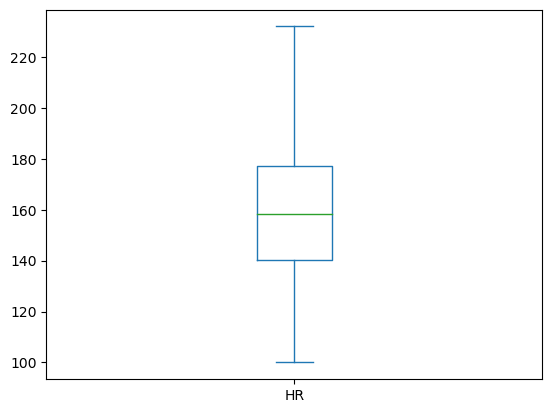

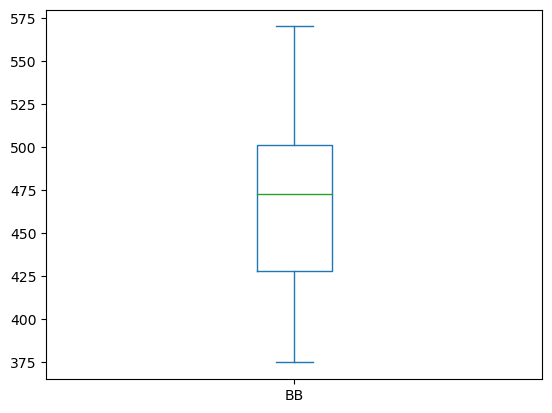

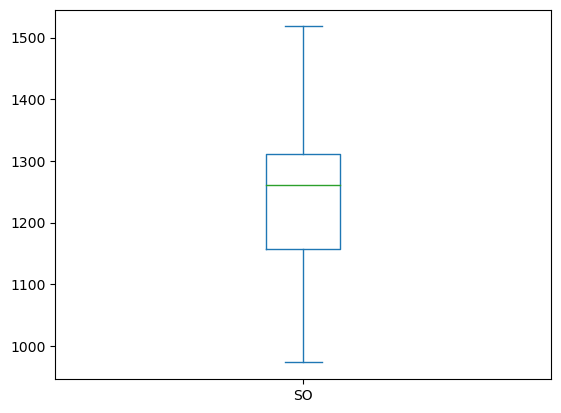

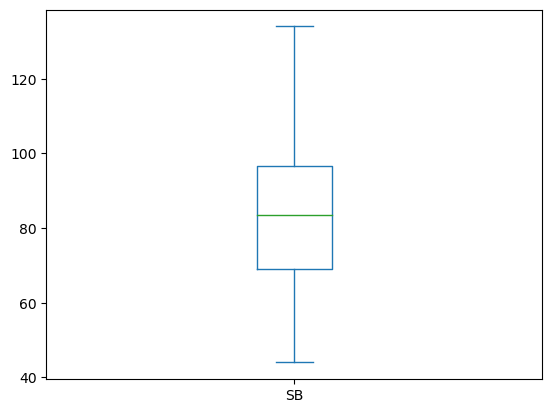

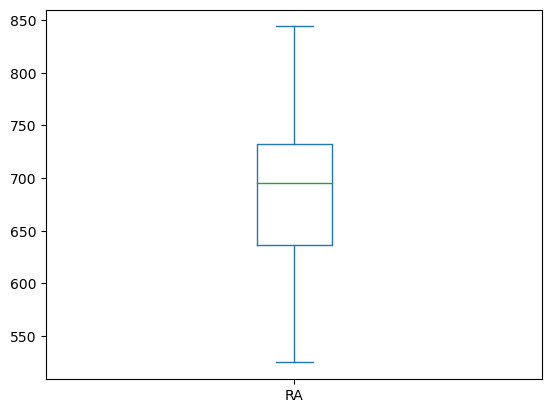

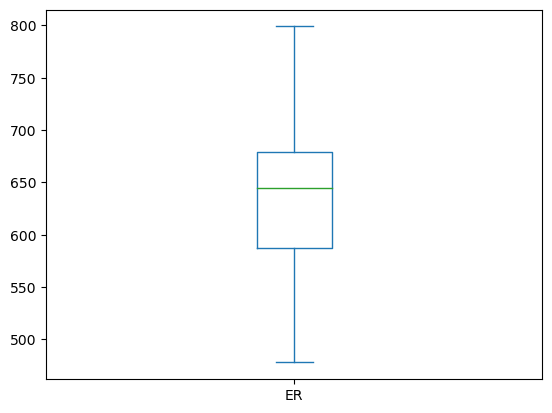

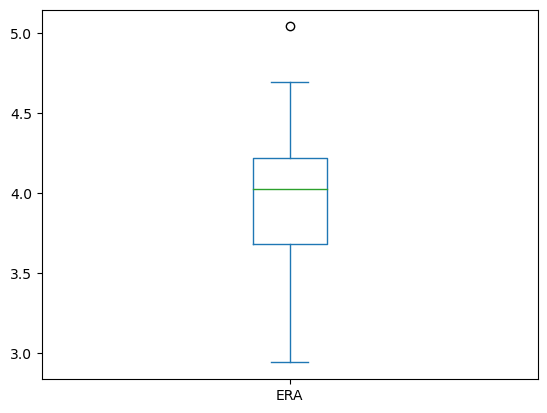

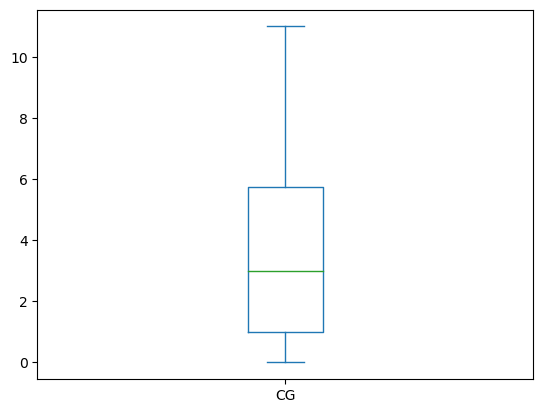

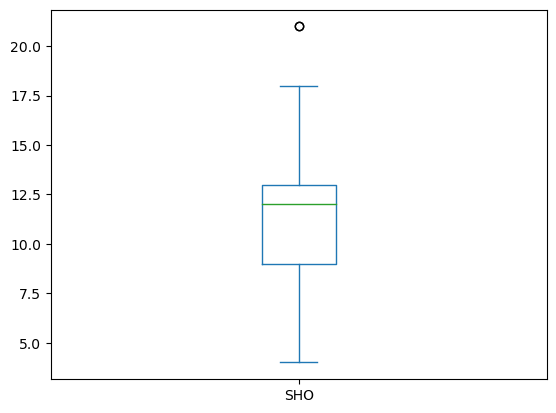

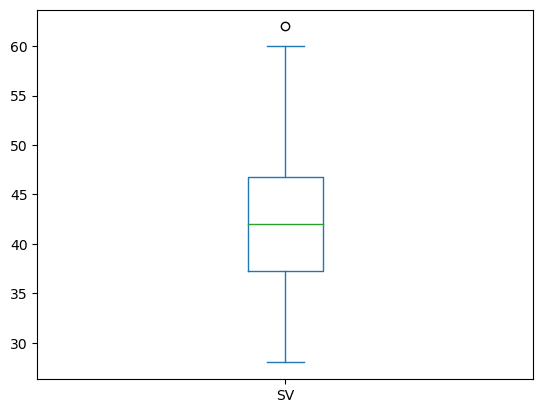

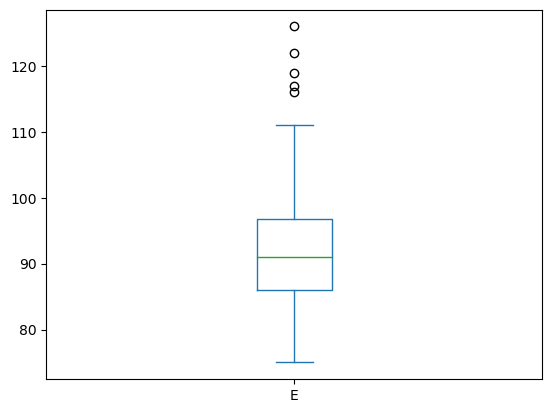

In [39]:
#Box plot visualization to check the prescence of outliers
for i in df.columns:
    df[i].plot.box()
    plt.show()

By visualization we can say that outliers are present in the dataset

**Removing Outliers by using Z-Score Method:**

In [40]:
#Removing outliers
from scipy.stats import zscore
col=df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO','SB','RA','ER','ERA','CG','SHO','SV','E']]
z=np.abs(zscore(col))

z


R        AB         H        2B        3B        HR        BB  \
0   0.619078  0.847731  1.663685  1.420173  1.041193  0.787299  1.534902   
1   0.134432  0.711094  0.970681  0.127403  1.235809  0.243967  0.536592   
2   0.332906  1.115233  0.151891  1.588795  0.223808  0.723377  1.139144   
3   1.146419  0.241522  0.401088  0.828122  0.418423  0.883181  1.160536   
4   0.013270  1.280738  1.984081  0.801892  1.722347  0.403770  0.251360   
5   3.509647  0.104884  1.361089  1.869832  1.391501  2.185047  1.798742   
6   1.311430  0.732263  0.116292  0.153633  1.196885  1.545833  1.513510   
7   0.428681  0.451289  0.596886  1.615025  1.099578  1.705636  0.910958   
8   0.765626  0.451289  0.365489  0.183611  0.068115  0.107601  0.590073   
9   1.034489  1.785913  1.628086  1.082929  0.165423  0.084163  0.158660   
10  1.086415  0.076017  0.275303  0.239818  0.068115  0.267405  0.604334   
11  0.705622  0.826562  0.721484  0.183611  0.515731  2.121125  0.301276   
12  0.471376  1.432772  1.291077  1.783647  1.002270  0.395247  0.607900   
13  0.557920  0.400291  0.436688  0.715707  0.904962  1.098383  0.158660   
14  0.099814  1.208570  0.026106  0.127403  1.430424  0.563574  0.105179   
15  0.713699  0.465723  0.312089  0.745685  0.749270  0.851220  0.657815   
16  0.151740  1.656011  1.040693  0.970514  0.418423  0.755338  0.144398   
17  0.013270  0.364688  1.113079  0.153633  0.126500  0.235444  1.745261   
18  0.575229  0.523457  0.454487  0.041219  0.262731  0.595534  1.017920   
19  0.834861  0.789997  0.383288  0.996744  0.418423  0.107601  0.479546   
20  0.090583  0.154920  0.935081  1.139136  1.391501  0.427208  0.336930   
21  0.255593  1.274002  0.721484  0.547085  1.780732  0.427208  1.246105   
22  1.302198  0.768828  0.293103  2.177099  0.846578  1.394552  1.677518   
23  1.994550  1.389471  0.757084  1.333988  1.294193  2.033766  0.033871   
24  1.077184  0.183787  0.525687  0.153633  0.554654  1.074945  1.463595   
25  0.367523  1.894646  1.024080  0.659500  0.515731  0.746815  1.673953   
26  0.134432  0.703396  1.467888  0.745685  0.749270  0.883181  0.215706   
27  0.549843  1.915815  1.610286  0.801892  1.625040  0.307888  0.372584   
28  0.661773  0.855429  1.415675  0.828122  0.457346  0.499652  0.768343   
29  0.844092  0.804431  1.343289  0.041219  1.722347  0.714854  1.445768   

          SO        SB        RA        ER       ERA        CG       SHO  \
0   2.697630  0.913883  0.666234  0.505110  0.506955  0.539806  0.814629   
1   0.154878  0.601826  0.165971  0.248930  0.254598  0.539806  0.172800   
2   0.893982  0.111449  0.680339  0.751623  0.641347  2.772641  0.320914   
3   0.168602  0.690985  0.180076  0.103922  0.053010  1.300442  0.567771   
4   0.105866  0.022290  1.618803  1.597501  1.531318  1.300442  0.172800   
5   0.952796  0.200609  0.257184  0.389104  0.350165  1.300442  0.320914   
6   0.207812  0.913883  0.137760  0.234429  0.165003  0.171757  1.802057   
7   0.811641  1.760897  0.067235  0.147424  0.209800  1.275906  0.320914   
8   0.605790  0.156029  0.652129  0.461608  0.484557  0.907856  0.172800   
9   0.982204  0.557246  0.913544  0.843461  0.792164  0.171757  0.320914   
10  0.148997  0.780144  0.631441  0.640451  0.635374  0.564343  0.567771   
11  1.409590  1.671738  0.990653  0.925632  0.865333  0.564343  0.419657   
12  0.962599  1.404260  0.186658  0.084588  0.036584  0.539806  0.172800   
13  0.860654  0.646405  0.532705  0.596948  0.456185  0.932393  0.172800   
14  1.266474  0.245188  0.575021  0.408438  0.411388  0.564343  0.913371   
15  0.184286  0.646405  2.302433  2.288705  2.276445  0.907856  0.913371   
16  0.723420  0.646405  1.300966  1.505663  1.671683  1.275906  0.419657   
17  2.644696  0.512666  1.131704  1.302652  1.335704  0.932393  2.394514   
18  0.497964  0.022290  0.687862  0.669452  0.724968  0.907856  1.061486   
19  0.066657  2.251273  0.927650  0.930466  0.836961  0.539806  0.814629   
20  0.409742  1.448839  1.061179  1.143144  1.178913  0.90

In [41]:
threshold=3

print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [42]:
df_new=df[(z<3).all(axis=1)]

df_new

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [43]:
df.shape

(30, 17)

In [44]:
df_new.shape

(29, 17)

In [45]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)
Dataloss

3.3333333333333335

In [46]:
df=df_new

In [47]:
df.shape

(29, 17)

Outliers are removed from the dataset

**Checking for skewness:**

In [48]:
#checking for skewness
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Accpecatble range for skewness is -0.5 to +0.5

**Removing Skewness using CBRT Method:**

In [49]:
#Removing Skewness 
df['H']=np.cbrt(df['H'])
df['CG']=np.cbrt(df['CG'])
df['SHO']=np.cbrt(df['SHO'])
df['SV']=np.cbrt(df['SV'])
df['E']=np.cbrt(df['E'])


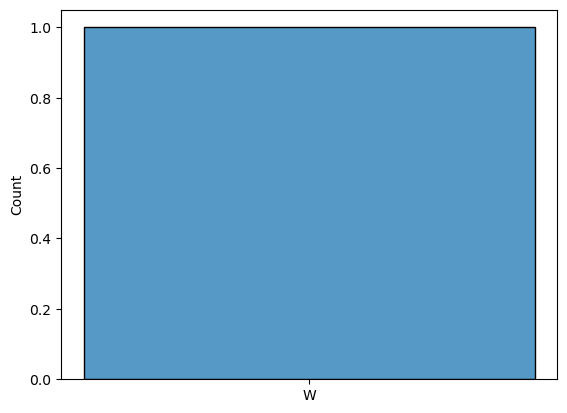

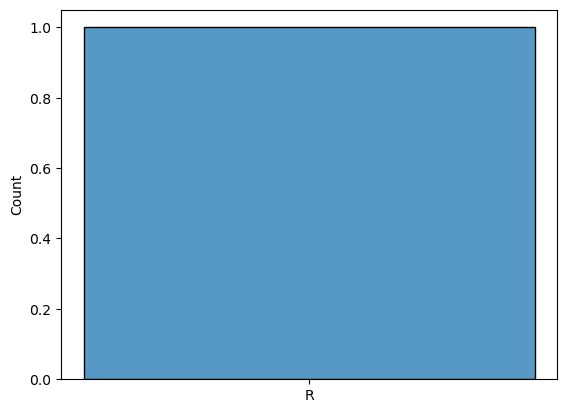

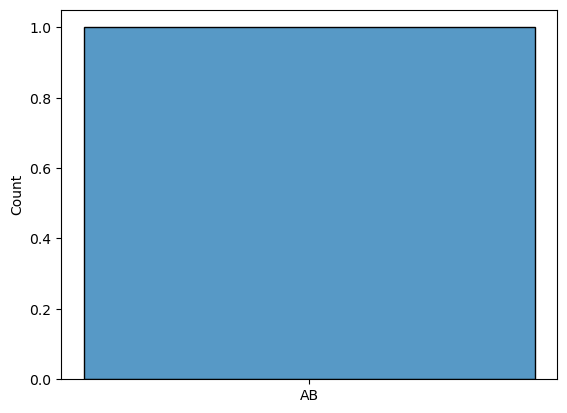

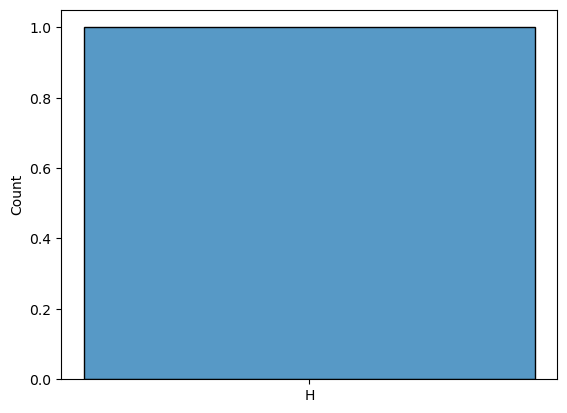

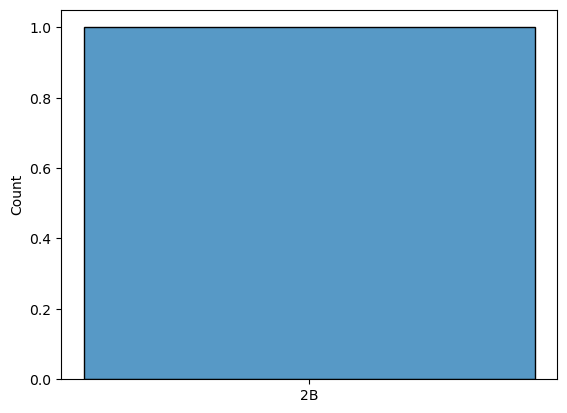

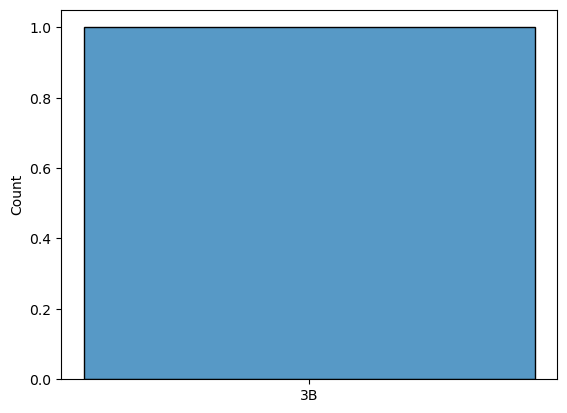

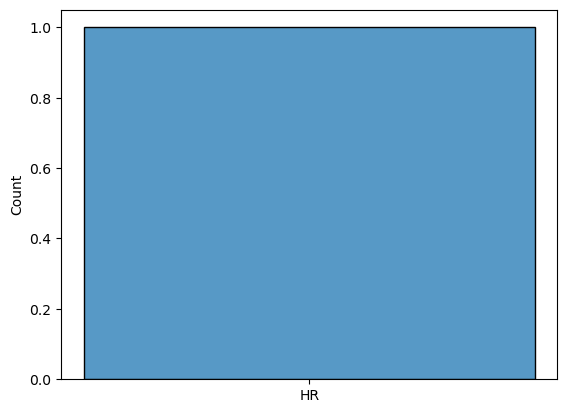

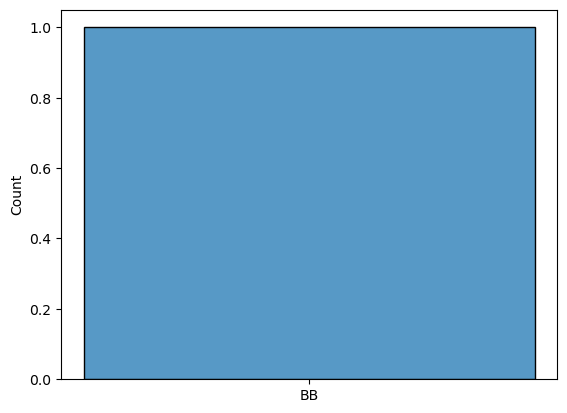

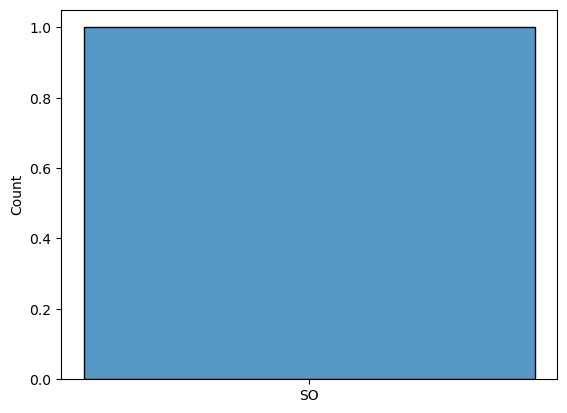

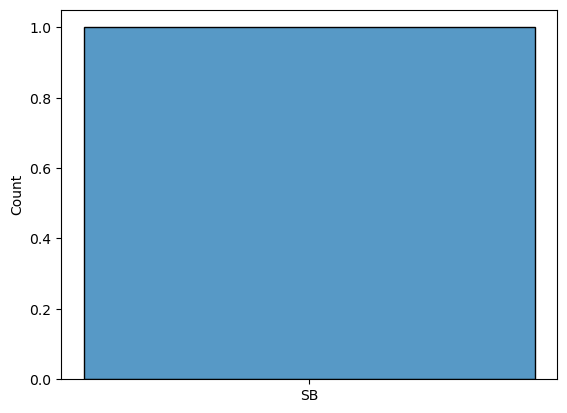

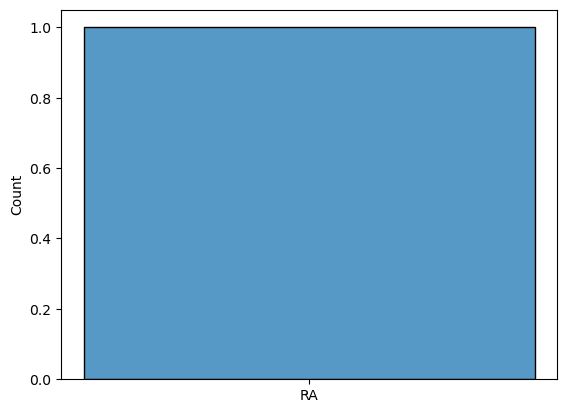

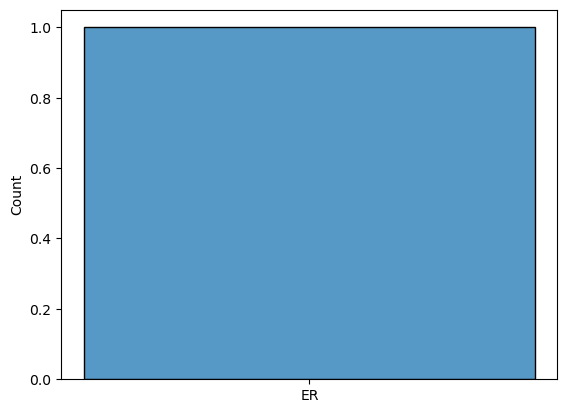

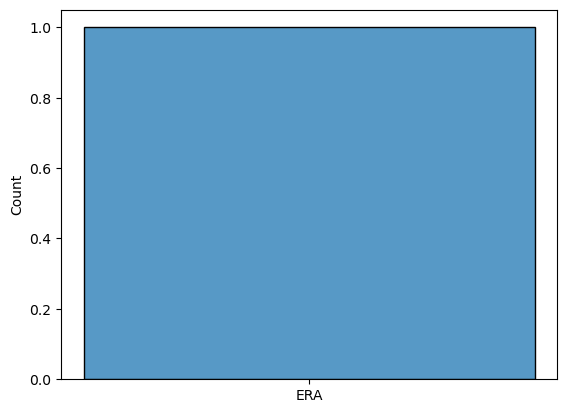

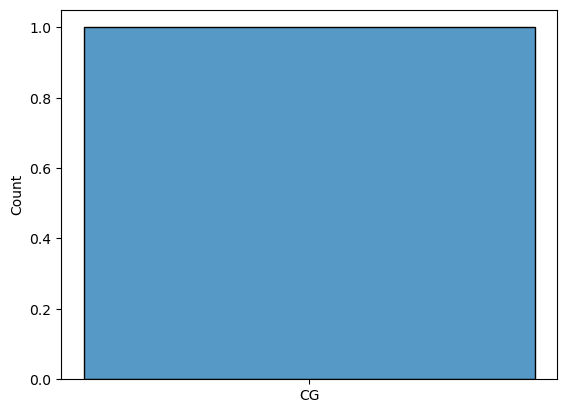

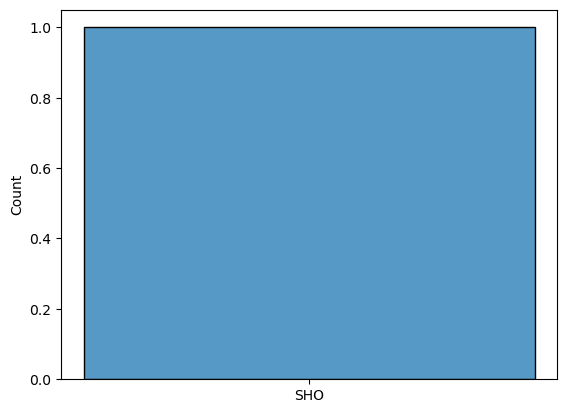

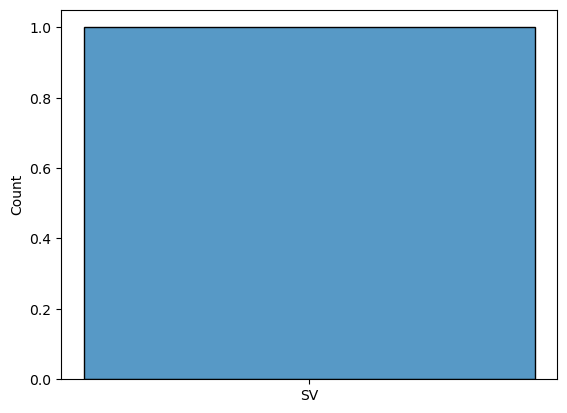

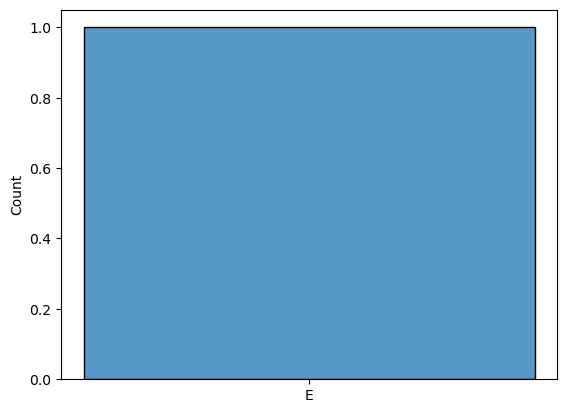

In [50]:
##checking for skewness by visualizing
for i in df.columns:
    sns.histplot([i])
    plt.show()

By visualization with histplot we can say that skewness is removed from the dataset

**Correlation between target variable and independent variables:**

In [51]:
#checking the correlation
cor=df.corr()
cor

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.390451 -0.085780 -0.019968  0.384886 -0.206737  0.245697   
R    0.390451  1.000000  0.438022  0.432686  0.469293  0.134204  0.586894   
AB  -0.085780  0.438022  1.000000  0.769847  0.490752  0.445604 -0.064653   
H   -0.019968  0.432686  0.769847  1.000000  0.527588  0.580521 -0.219048   
2B   0.384886  0.469293  0.490752  0.527588  1.000000  0.342419 -0.098695   
3B  -0.206737  0.134204  0.445604  0.580521  0.342419  1.000000 -0.369299   
HR   0.245697  0.586894 -0.064653 -0.219048 -0.098695 -0.369299  1.000000   
BB   0.447513  0.258450 -0.137850 -0.221951  0.211243 -0.404852  0.336814   
SO   0.156469  0.081158 -0.111243 -0.372834 -0.096772 -0.196586  0.479914   
SB  -0.169503  0.075323  0.373674  0.419443  0.194308  0.483818 -0.166072   
RA  -0.823176 -0.013858  0.315499  0.243965 -0.215196  0.312750 -0.092586   
ER  -0.815308  0.007727  0.309146  0.280165 -0.224993  0.333731 -0.062094   
ERA -0.826952 -0.009122  0.254872  0.256080 -0.248212  0.325883 -0.070756   
CG  -0.026520  0.139375 -0.060875  0.019113  0.276151  0.026726  0.101244   
SHO  0.468575 -0.132095 -0.192559 -0.125869  0.088807 -0.070633 -0.043683   
SV   0.755967  0.074712 -0.132717 -0.093453  0.254589 -0.244604  0.089909   
E   -0.074272  0.041739  0.320010 -0.012565  0.146268  0.101823 -0.184928   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.447513  0.156469 -0.169503 -0.823176 -0.815308 -0.826952 -0.026520   
R    0.258450  0.081158  0.075323 -0.013858  0.007727 -0.009122  0.139375   
AB  -0.137850 -0.111243  0.373674  0.315499  0.309146  0.254872 -0.060875   
H   -0.221951 -0.372834  0.419443  0.243965  0.280165  0.256080  0.019113   
2B   0.211243 -0.096772  0.194308 -0.215196 -0.224993 -0.248212  0.276151   
3B  -0.404852 -0.196586  0.483818  0.312750  0.333731  0.325883  0.026726   
HR   0.336814  0.479914 -0.166072 -0.092586 -0.062094 -0.070756  0.101244   
BB   1.000000  0.315566 -0.117622 -0.425381 -0.455832 -0.465794  0.441020   
SO   0.315566  1.000000  0.038188 -0.140570 -0.177655 -0.195362 -0.071027   
SB  -0.117622  0.038188  1.000000  0.134315  0.146243  0.128848 -0.038037   
RA  -0.425381 -0.140570  0.134315  1.000000  0.991286  0.986781  0.104318   
ER  -0.455832 -0.177655  0.146243  0.991286  1.000000  0.997261  0.106789   
ERA -0.465794 -0.195362  0.128848  0.986781  0.997261  1.000000  0.111579   
CG   0.441020 -0.071027 -0.038037  0.104318  0.106789  0.111579  1.000000   
SHO  0.419117  0.188445 -0.095712 -0.638650 -0.637349 -0.637886  0.120171   
SV   0.200162  0.110550 -0.189903 -0.635175 -0.614018 -0.629629 -0.244668   
E   -0.051655  0.149606  0.079519  0.204436  0.139676  0.115442 -0.025993   

          SHO        SV         E  
W    0.468575  0.755967 -0.074272  
R   -0.132095  0.074712  0.041739  
AB  -0.192559 -0.132717  0.320010  
H   -0.125869 -0.093453 -0.012565  
2B   0.088807  0.254589  0.146268  
3B  -0.070633 -0.244604  0.101823  
HR  -0.043683  0.089909 -0.184928  
BB   0.419117  0.200162 -0.051655  
SO   0.188445  0.110550  0.149606  
SB  -0.095712 -0.189903  0.079519  
RA  -0.638650 -0.635175  0.204436  
ER  -0.637349 -0.614018  0.139676  
ERA -0.637886 -0.629629  0.115442  
CG   0.120171 -0.244668 -0.025993  
SHO  1.000000  0.201450 -0.143944  
SV   0.201450  1.000000 -0.058435  
E   -0.143944 -0.058435  1.000000

**visualizng the correlation with help of heatmap:**

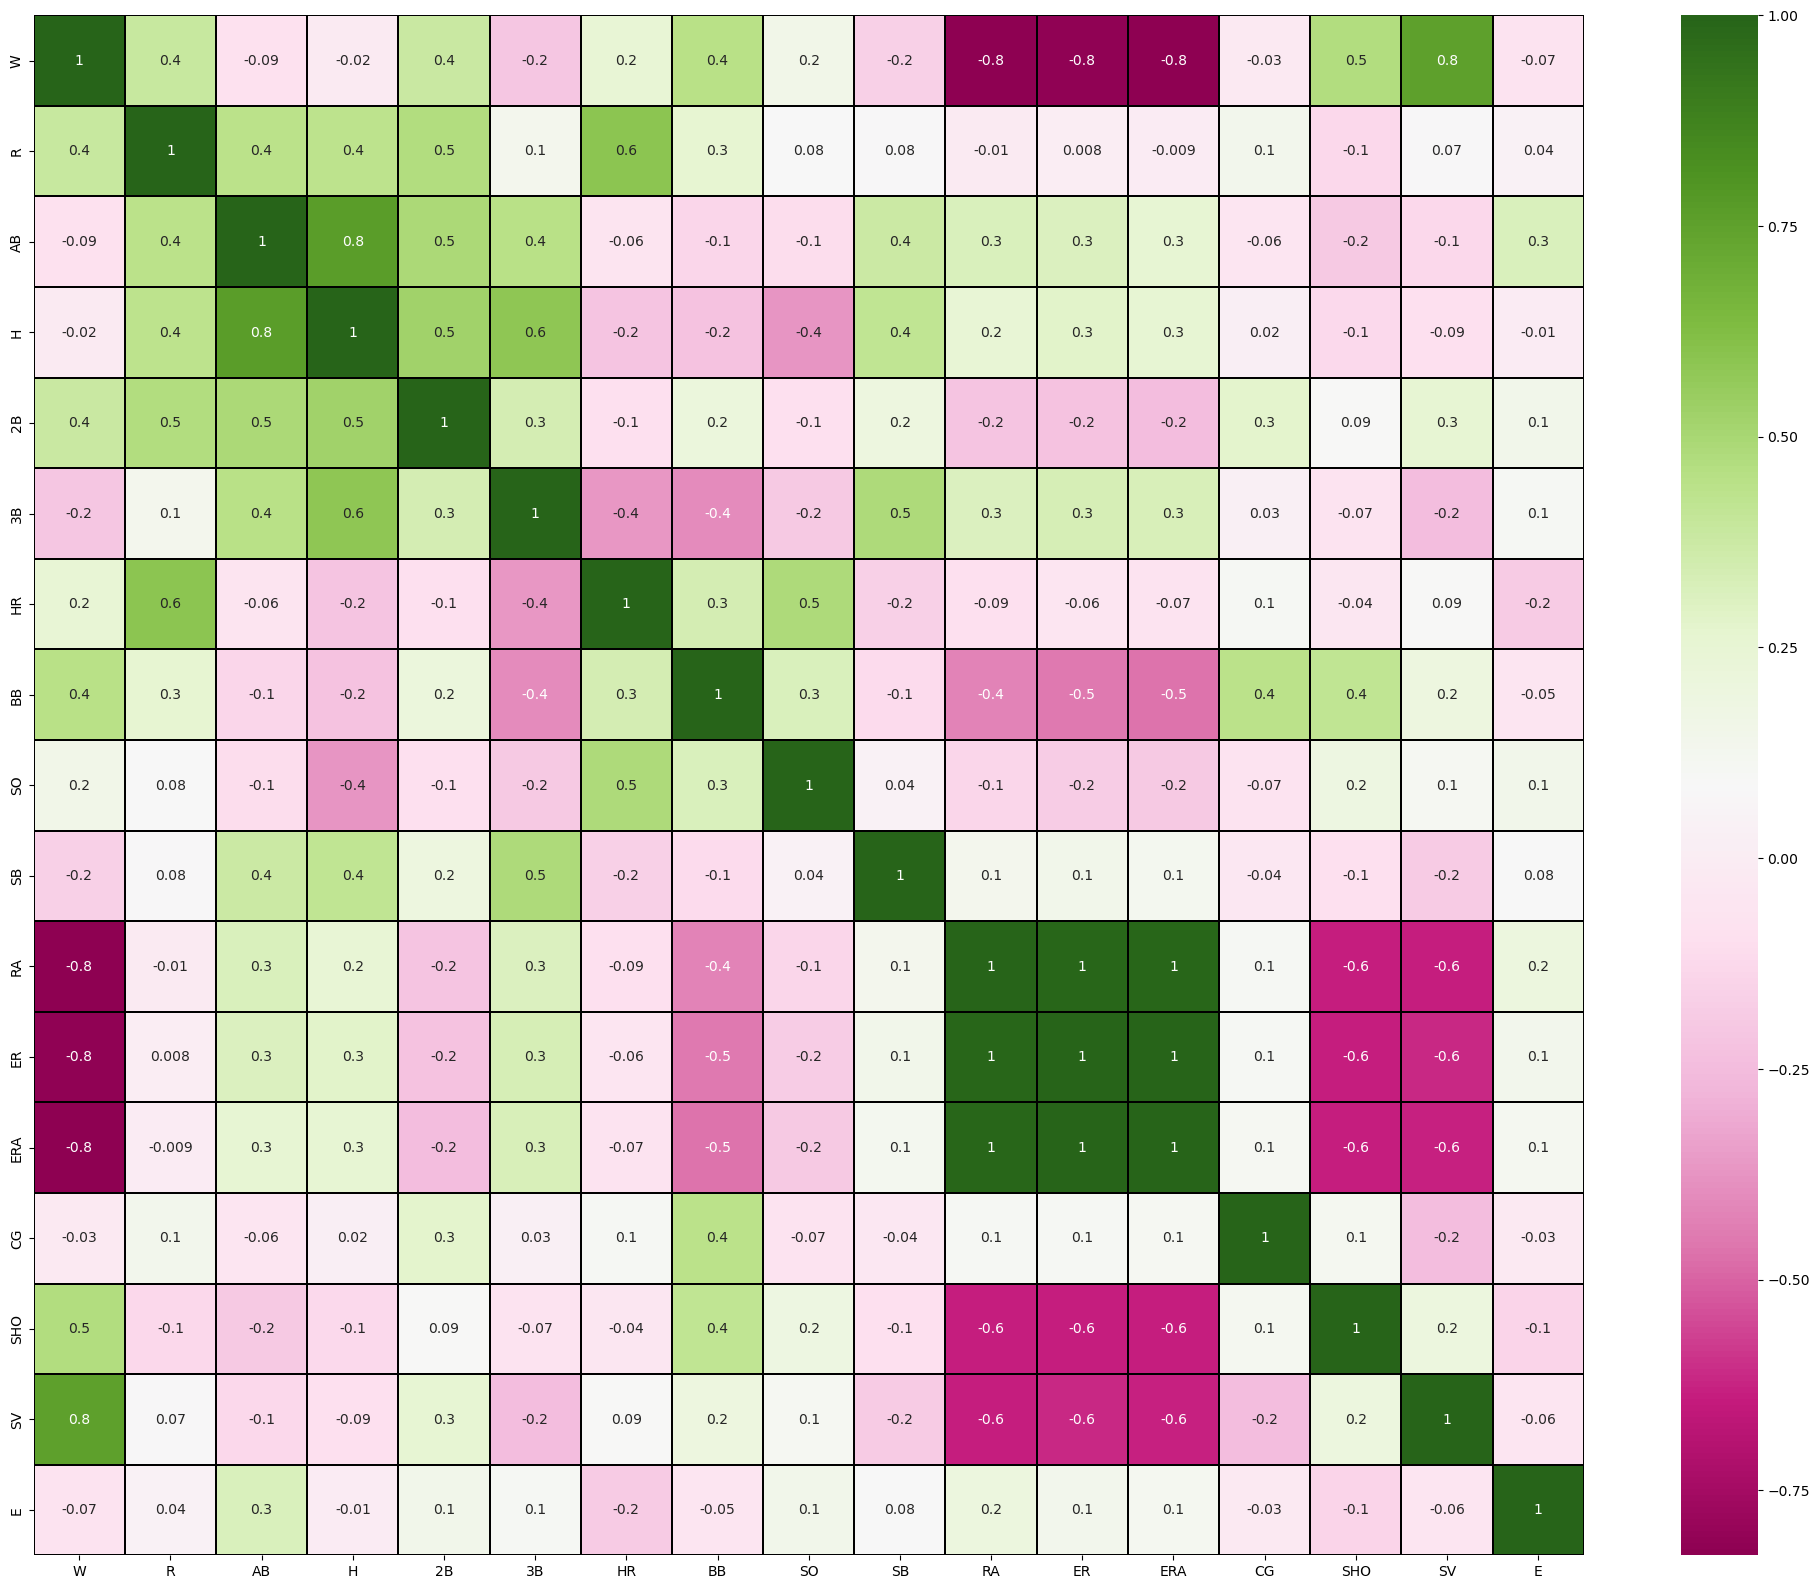

In [52]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), linewidths=0.1, fmt='.1g', linecolor='black', annot=True, cmap='PiYG')
plt.show()

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between input and target variable. This heatmap contains both positive and negative correlation

* ERA,ER,RA are highly corelated with each other

* H & AB are correlated with each other

* 3B & HR are negativley correlated with each other

In [53]:
cor['W'].sort_values(ascending=False)

W      1.000000
SV     0.755967
SHO    0.468575
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
SO     0.156469
H     -0.019968
CG    -0.026520
E     -0.074272
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
Name: W, dtype: float64

We can observe the positive and negative correlated features with the target. column SV is positively corelated with target variable and ERA negatively corelated with target variable

# Separating Columns into features and label

In [54]:
x=df.drop('W',axis=1)
y=df['W']

In [55]:
x

R    AB          H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  \
0   724  5575  11.439506  300  42  139  383   973  104  641  601  3.73   
1   696  5467  11.049365  277  44  156  439  1264   70  700  653  4.07   
2   669  5439  11.173556  303  29  141  533  1157   86  640  584  3.67   
3   622  5533  11.136051  260  27  136  404  1231   68  701  643  3.98   
4   689  5605  11.485173  289  49  151  455  1259   83  803  746  4.64   
6   764  5567  11.178893  272  19  212  554  1227   63  698  652  4.03   
7   713  5485  11.106405  246  20  217  418  1331   44  693  646  4.05   
8   644  5485  11.141425  278  32  167  436  1310   87  642  604  3.74   
9   748  5640  11.434409  294  33  161  478  1148   71  753  694  4.31   
10  751  5511  11.237270  279  32  172  503  1233  101  733  680  4.24   
11  729  5459  11.087457  278  26  230  486  1392  121  618  572  3.57   
12  661  5417  11.000000  243  21  176  435  1150   52  675  630  3.94   
13  656  5544  11.130673  262  22  198  478  1336   69  726  677  4.16   
14  694  5600  11.200191  277  46  146  475  1119   78  729  664  4.14   
15  647  5484  11.149475  288  39  137  506  1267   69  525  478  2.94   
16  697  5631  11.349650  292  27  140  461  1322   98  596  532  3.21   
17  689  5491  11.027480  272  30  171  567  1518   95  608  546  3.36   
18  655  5480  11.127982  274  34  145  412  1299   84  737  682  4.28   
19  640  5571  11.138739  257  27  167  496  1255  134  754  700  4.33   
20  683  5527  11.054823  295  17  177  488  1290   51  613  557  3.43   
21  703  5428  11.087457  265  13  177  539  1344   57  635  577  3.62   
22  613  5463  11.239909  236  40  120  375  1150  112  678  638  4.02   
23  573  5420  11.082031  251  18  100  471  1107   69  760  698  4.41   
24  626  5529  11.117204  272  37  130  387  1274   88  809  749  4.69   
25  667  5385  11.041168  263  26  187  563  1258   59  595  553  3.44   
26  696  5565  11.411418  288  39  136  457  1159   93  627  597  3.72   
27  720  5649  11.431859  289  48  154  490  1312  132  713  659  4.04   
28  650  5457  10.980682  260  36  148  426  1327   82  731  655  4.09   
29  737  5572  11.393471  274  49  186  388  1283   97  844  799  5.04   

          CG       SHO        SV         E  
0   1.259921  2.000000  3.825862  4.447960  
1   1.259921  2.289428  3.556893  4.414005  
2   2.223980  2.154435  3.361975  4.290840  
3   1.912931  2.080084  3.332222  4.657010  
4   1.912931  2.289428  3.271066  4.414005  
6   1.442250  1.587401  3.634241  4.530655  
7   0.000000  2.154435  3.503398  4.254321  
8   1.000000  2.289428  3.914868  4.562903  
9   1.442250  2.154435  3.419952  4.594701  
10  1.709976  2.080084  3.556893  4.918685  
11  1.709976  2.351335  3.391211  4.396830  
12  1.259921  2.289428  3.583048  4.530655  
13  1.817121  2.289428  3.556893  4.546836  
14  1.709976  2.466212  3.036589  5.013298  
15  1.000000  2.466212  3.957892  4.578857  
16  0.000000  2.351335  3.779763  4.959676  
17  1.817121  2.758924  3.634241  4.805896  
18  1.000000  1.912931  3.419952  4.876999  
19  1.259921  2.000000  3.271066  4.481405  
20  1.000000  2.410142  3.684031  4.447960  
21  1.587401  2.351335  3.448217  4.481405  
22  0.000000  2.289428  3.271066  4.254321  
23  1.442250  2.154435  3.530348  4.481405  
24  1.000000  1.912931  3.271066  4.890973  
25  1.817121  2.758924  3.608826  4.217163  
26  1.912931  2.620741  3.448217  4.272659  
27  1.000000  2.289428  3.530348  4.414005  
28  1.000000  1.817121  3.448217  4.514357  
29  1.587401  1.587401  3.301927  4.562903

In [56]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [57]:
x.shape

(29, 16)

In [58]:
y.shape

(29,)

# Feature Scalling Using Standard Scalarization

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

R        AB         H        2B        3B        HR        BB  \
0   0.959398  0.830084  1.728647  1.556538  1.010845 -0.765863 -1.536359   
1   0.331147 -0.702831 -0.946162  0.201171  1.208917 -0.181389 -0.495021   
2  -0.274666 -1.100253 -0.094708  1.733325 -0.276617 -0.697101  1.252941   
3  -1.329231  0.233951 -0.351839 -0.800621 -0.474688 -0.869006 -1.145857   
4   0.174084  1.255894  2.041742  0.908319  1.704094 -0.353293 -0.197495   
5   1.856900  0.716535 -0.058116 -0.093474 -1.266972  1.743939  1.643442   
6   0.712585 -0.447345 -0.555092 -1.625627 -1.167936  1.915843 -0.885522   
7  -0.835605 -0.447345 -0.315000  0.260100  0.020490  0.196801 -0.550807   
8   1.497899  1.752672  1.693704  1.202964  0.119526 -0.009484  0.230197   
9   1.565212 -0.078310  0.342114  0.319029  0.020490  0.368705  0.695081   
10  1.071586 -0.816380 -0.685001  0.260100 -0.573723  2.362794  0.378960   
11 -0.454167 -1.412514 -1.284608 -1.802414 -1.068901  0.506228 -0.569402   
12 -0.566355  0.390081 -0.388713 -0.682763 -0.969865  1.262607  0.230197   
13  0.286272  1.184926  0.087905  0.201171  1.406988 -0.525197  0.174411   
14 -0.768292 -0.461539 -0.259808  0.849390  0.713739 -0.834625  0.750867   
15  0.353585  1.624929  1.112593  1.085106 -0.474688 -0.731482 -0.085923   
16  0.174084 -0.362183 -1.096208 -0.093474 -0.177581  0.334324  1.885182   
17 -0.588792 -0.518313 -0.407164  0.024384  0.218561 -0.559578 -0.997094   
18 -0.925355  0.773310 -0.333415 -0.977408 -0.474688  0.196801  0.564913   
19  0.039459  0.148789 -0.908743  1.261893 -1.465043  0.540609  0.416151   
20  0.488210 -1.256383 -0.685001 -0.505976 -1.861185  0.540609  1.364512   
21 -1.531169 -0.759605  0.360207 -2.214917  0.812774 -1.419099 -1.685122   
22 -2.428670 -1.369933 -0.722200 -1.330982 -1.366007 -2.106716  0.100030   
23 -1.239481  0.177176 -0.481056 -0.093474  0.515668 -1.075291 -1.461978   
24 -0.319542 -1.866711 -1.002359 -0.623834 -0.573723  0.884418  1.810800   
25  0.331147  0.688148  1.536074  0.849390  0.713739 -0.869006 -0.160305   
26  0.869648  1.880415  1.676221  0.908319  1.605059 -0.250150  0.453341   
27 -0.700980 -0.844767 -1.417049 -0.800621  0.416632 -0.456435 -0.736760   
28  1.251086  0.787503  1.413033  0.024384  1.704094  0.850037 -1.443382   

          SO        SB        RA        ER       ERA        CG       SHO  \
0  -2.727623  0.905953 -0.664514 -0.511148 -0.511388 -0.094672 -0.756001   
1   0.121896 -0.585315  0.154638  0.232161  0.238952 -0.094672  0.274630   
2  -0.925866  0.116458 -0.678397 -0.754153 -0.643801  1.615608 -0.206072   
3  -0.201246 -0.673037  0.168522  0.089217  0.040333  1.063794 -0.470829   
4   0.072935 -0.015124  1.584683  1.561540  1.496876  1.063794  0.274630   
5  -0.240414 -0.892341  0.126870  0.217866  0.150677  0.228786 -2.225231   
6   0.777970 -1.725697  0.057451  0.132100  0.194815 -2.329822 -0.206072   
7   0.572335  0.160319 -0.650630 -0.468265 -0.489319 -0.555782  0.274630   
8  -1.013995 -0.541454  0.890486  0.818231  0.768604  0.228786 -0.206072   
9  -0.181661  0.774370  0.612808  0.618110  0.614123  0.703744 -0.470829   
10  1.375292  1.651587 -0.983844 -0.925686 -0.864490  0.703744  0.495072   
11 -0.994411 -1.374810 -0.192460 -0.096610 -0.047943 -0.094672  0.274630   
12  0.826931 -0.629176  0.515620  0.575226  0.437572  0.893823  0.274630   
13 -1.297968 -0.234429  0.557272  0.389399  0.393434  0.703744  0.904141   
14  0.151272 -0.629176 -2.275049 -2.269360 -2.254827 -0.555782  0.904141   
15  0.689841  0.642788 -1.289290 -1.497462 -1.658968 -2.329822  0.495072   
16  2.609104  0.511205 -1.122683 -1.297340 -1.327935  0.893823  1.946464   
17  0.464621  0.028736  0.668344  0.646698  0.702398 -0.555782 -1.066046   
18  0.033766  2.221778  0.904370  0.903998  0.812742 -0.094672 -0.756001   
19  0.376492 -1.418671 -1.053264 -1.140102 -1.173453 -0.555782  0.704481   
20  0.905268 -1.155506 -0.747817 -0.854214 -0.754146  0.486291  0.495072   
21 -0.994411  1.256840 -0.150808  0.017745  0.128608 -2.32

We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert the data into mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

**Checking Variance Inflation factor(VIF):**

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values Features
0      7.129398        R
1     17.127199       AB
2      8.943978        H
3      3.838686       2B
4      3.119383       3B
5      8.567797       HR
6      3.398779       BB
7      2.775861       SO
8      1.896698       SB
9    193.624643       RA
10  1884.267679       ER
11  1470.907049      ERA
12     2.720635       CG
13     3.126618      SHO
14     4.802400       SV
15     2.109031        E

Accpectable range for vif is -10 to +10. so to balance it we drop the column with highest vif values and then again check it that the vif value is in accpetable range or not

In [61]:
#dropping pdays column 
x.drop('ER', axis=1, inplace=True)

In [62]:
#dropping pdays column 
x.drop('ERA', axis=1, inplace=True)

In [63]:
#again checking vif value to confrim whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF values Features
0     6.245528        R
1     4.618469       AB
2     6.875063        H
3     3.418836       2B
4     2.942963       3B
5     6.200781       HR
6     3.084407       BB
7     2.332569       SO
8     1.747416       SB
9     5.050664       RA
10    2.430768       CG
11    2.950560      SHO
12    2.324694       SV
13    2.035406        E

Here we can say that the multicolinearity is removed from the data set

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Splitting the data for training and testing

**Finding best random state:**

In [67]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9629679787029629 on Random_state 189


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=maxRS)

In [70]:
x_train.shape

(22, 14)

In [71]:
x_test.shape

(7, 14)

In [72]:
y_train.shape

(22,)

In [73]:
y_test.shape

(7,)

# Modeling

# Linear Regression

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
lr.coef_

array([ 5.45674006,  1.2155703 , -0.39972864, -1.48831255, -0.45362175,
       -2.58685677, -0.85569389,  1.12013544, -0.70077407, -6.39331346,
        1.53728967,  0.61344922,  3.92392321, -0.31372331])

In [76]:
lr.intercept_

80.08513531071307

In [77]:
lr.score(x_train,y_train)

0.8772694564760288

In [78]:
pred=lr.predict(x_test)
print("predicted result:",pred)
print("actual ",y_test)

predicted result: [98.93456766 83.01049338 67.20434316 64.53710048 60.66697281 88.07461114
 73.04083538]
actual  15    100
10     88
29     68
19     64
24     63
25     92
28     74
Name: W, dtype: int64


In [79]:
print('error:')

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 2.086468134618471
mean squared error: 6.96050849276962
Root Mean squared error: 2.6382775617378886


In [80]:
from sklearn.metrics import r2_score
print (r2_score(y_test,pred))

0.9629679787029629


In [81]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

# SGDRegressor

In [82]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9627885877283413
mse: 6.9942266739178995
mae: 2.39282389991547
rmse: 2.6446600299316168


# Lasso Regressor

In [83]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 1, 'random_state': 0}


In [84]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8967303881890577
mse: 19.410471934260787
mae: 4.051129626033555
rmse: 4.405731713831516


# Ridge Regressor

In [85]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'sag'}


In [86]:
rd=Ridge(alpha=10,solver='saga')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8524094974495633
mse: 27.740990377337198
mae: 4.676024805237383
rmse: 5.266971651465118


# Selection of the final model

Here after trying different different model and comparing **r2 score** of all the different different model we can say that **Linear Regression** is our final model because **r2 score of Linear regression** is highest among all of others with (96.29%). so we select **linear regression** as our final model.

# Hyperparameter Tuning On best Model

In [92]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False],
    'n_jobs': [None]
}

LR = LinearRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_estimator_.get_params()
best_score = grid_search.best_score_

# Create the Linear Regression model with the best parameters
best_LR = LinearRegression(**best_params)

# Fit the model on the training data
best_LR.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_LR.predict(x_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with Hyperparameter Tuning:")
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2*100)

Linear Regression with Hyperparameter Tuning:
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Mean Squared Error (MSE): 6.96050849276962
R-squared (R2): 96.29679787029629


**R2 Scoce after hyperparameter tuning is same as before hyperparameter tuning**

# Best Fit Line

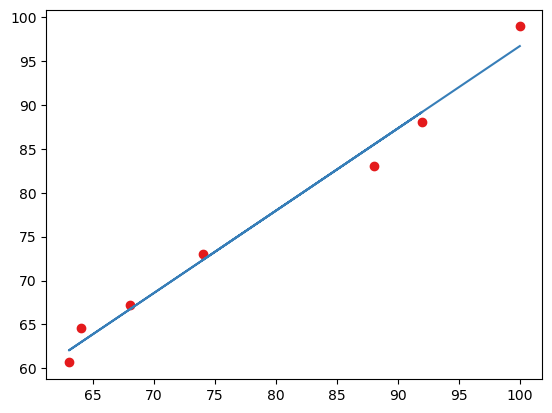

In [93]:
palette = "Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()

# Saving the model:

In [99]:
filename = 'BaseBallCaseStudy.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Predictions:

In [100]:
#Loading the saved model
model=joblib.load("BaseBallCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([98.93456766, 83.01049338, 67.20434316, 64.53710048, 60.66697281,
       88.07461114, 73.04083538])

In [101]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0          1          2        3          4          5  \
Predicted   98.934568  83.010493  67.204343  64.5371  60.666973  88.074611   
Original   100.000000  88.000000  68.000000  64.0000  63.000000  92.000000   

                   6  
Predicted  73.040835  
Original   74.000000

# Conclusion

* Both original and predicted values are almost equal.
* we can say that our model Linear Regression is working fine as our prediction and original values are almost same

# END OF THE PROJECT